## Введение

**Цель проекта:** определить определяющие успешность видеоигры закономерности.

Что включает в себя проект:
- Подготовка данных,
- Исследовательский анализ данных,
- Составление "портрета" пользователя каждого региона,
- Проверка гипотез, 
- Выводы.

Для определения успешности игры, у нас имеется датасет с набором данных о видах платформ, регионах, рейтингах и продажах и других не менее важных данных.

Пользуясь известными инствументами, мы будем определять, какие параметры и в какой степени могут влиять на успешность той или иной игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**


- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
- `EU_sales` — продажи в Европе (миллионы проданных копий);
- `JP_sales` — продажи в Японии (миллионы проданных копий);
- `Other_sales` — продажи в других странах (миллионы проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

*В процессе предобработки названия могут быть изменены. На стадии анализа могут быть добавлены новые столбцы. Обо всех изменениях будет указано в тексте.*

## Знакомство с датасетом

In [1]:
import pandas as pd #импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings

In [3]:
#читаем датафрейм

try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv(r'E:\Practicum\2_Projects_Git\5_games_and_consoles\games.csv')
df.info() #выводим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Здесь мы ознакомились с основной информацией о датасете:
- Количество столбцов и строк,
- Количество пропусков (т.е. наоборот, количество заполненных ячеек в каждом столбце),
- Тип данных в столбцах.

In [4]:
df.isna().sum() #Выводим количество пропусков по столбцам (для наглядности)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Датасет содержит 16 715 строк и 11 столбцов (включая index), имеет пропуски и, для некоторых данных, неподходящий тип.

На этом общее знакомство с датасетом окончено.

In [5]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Предобработка данных

### Обработка названий столбцов

В датасете названия столбцов начинаются с заглавной буквы, также имеются сокращения, тоже с заглавными. Чтобы избежать путаницы и ненужных ошибок в будущем, приведем все к нижнему регистру. В остальном - названия столбцов выполнены корректно.

In [6]:
df = df.rename(
    columns=str.lower
) #перевод в нижний регистр названий всех столбцов

### Преобразование типов данных

Ознакомимся с данными в столбцах и, где это необходимо, изменим тип данных.

- Строковый тип должны иметь: `name`, `platform`, `genre`, `rating`, так как эти значения имеют буквенное обозначение или словесное описание (в т.ч. могут содержать цифры);
- Целочисленный тип - `critic_score`, т.к. это стобалльная оценка без дробной части (но на самом деле это не принципиально, она может быть с типом `float`; `year_of_release` - несмотря на то, что год - это дата, здесь год используется без привязки к числу (без месяца и дня), а следовательно, все операции можно проводить как с целым числом;
- Остальные столбцы должны иметь значение с плавающей точкой, т.к. могут быть записаны (и записаны) десятичной дробью (миллионы копий). Также, сюда относится пользовательский рейтинг `user_score`, который, в отличие от рейтинга критиков, оценивается по 10-тибалльной шкале с возможной дробной частью.

Имеем несовпадение для столбцов: `year_of_release`, `critic_score` и `user_score`.

Для преобразования столбцов в `int` необходимо, чтобы в них не было пропусков.

### Поиск дубликатов

Посчитаем количество явных дубликатов:

In [7]:
df.duplicated().sum()

0

Явных дубликатов нет. 

К сожалению, мы не сможем провести поиск неявных дубликатов, т.к. среди игр есть такие, которые выходили на разные платформы, что не является дублем. Вручную такая обработка нецелесообразна.

### Обработка пропусков

#### `year_of_release`

Количество пропусков в столбце `year_of_release` позволяет нам убрать эти данные. Заполнение синтетическими данными может сильно исказить реальные данные.

In [8]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [9]:
df['year_of_release'] = df['year_of_release'].astype('int') #преобразование типа в целочисленный

#### `name` и `genre`

У нас есть по два пропуска в названии и жанре. С одной стороны, мы не имеем возможности восстановить такие параметры, как имя или жанр, а с другой - недостающих строк настолько мало, что ими можем пренебречь. Удалим строки с пропусками:

In [10]:
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)

#### `user_score` и `critic_score`

В оценках нередко бывает так, что критики могут сходиться во мнении с игроками и выставлять пропорциональные оценки.

Для заполнения пропусков в оценках нужно проанализировать корреляцию оценок критиков и игроков по жанрам для тех игр, где имеется две оценки. Создадим новую временную сводную таблицу с оценками и измененным типом данных (т.к. с `str` нельзя посчитать корреляцию).

In [11]:
df_corr = df.dropna(subset=['critic_score', 'user_score'])
df_corr = df_corr.query('user_score != "tbd"')
df_corr['user_score'] = df_corr['user_score'].astype('float')
df_corr

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
...,...,...,...,...,...,...,...,...,...,...,...
16402,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,0.01,0.00,0.00,0.00,81.0,8.8,M
16421,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M
16425,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61.0,5.8,T
16431,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+


In [12]:
display(df_corr['critic_score'].corr(df_corr['user_score']))

0.5796706281932219

Корреляция между оценкой критика и игрока средняя, близкая к слабой, но положительная. Это значит, что, с ростом оценки критика обычно растет и оценка игрока (и наоборот), но без прямой зависимости. 

Также это может значить, что у одной игры оценка критика может быть выше оценки игрока (приведенной, умноженной на 10), а у другой - ниже.

Таким образом, мы не можем корректно обработать пропуски в оценках. Поэтому имеет смысл использовать заглушки - значения, которые могут принадлежать только к неизвестным данным, имеющие тот же тип данных. В данном случае это могут быть отрицательные значения типа float, например, -1.0.

Для начала нужно изменить тип данных для оценки пользователя, а для этого, в свою очередь, разобраться с `tbd`.

`TBD` - аббревиатура от английского `To Be Determined` (будет определено). То есть оценки как таковой нет совсем. Значит в ячейках должны были быть пустые значения.

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.NaN #замена значений tbd на пустое (но числовое) значение NaN
df['user_score'] = df['user_score'].astype('float') #преобразование типа 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Теперь мы имеем необходимые данные, чтобы заполнить пропуски `critic_score` и `user_score` значением -1.0.

In [15]:
df.loc[df['user_score'].isnull(), 'user_score'] = -1.0
#фильтр: если нет оценки пользователя, заменяем пропуск на -1.0 (не встречающее в реальных данных значение)
df.loc[df['critic_score'].isnull(), 'critic_score'] = -1.0
#фильтр: если нет оценки критика, заменяем пропуск на -1.0 (не встречающее в реальных данных значение)

Данные заполнены заглушками, это не будет влиять на оценку каких-либо параметров в дальнейшем.

#### `rating`

В данном столбце мы не можем поставить определенные значения. С одной стороны, мы не можем заполнить возрастные ограничения никакой медианой, а с другой стороны - пустых значений слишком много, чтобы удалить строки. Заполним значением `n/a`.

In [17]:
df.loc[df['rating'].isnull(), 'rating'] = 'n/a'

На этом обработка пропусков, работа с типами данных и обработка названий столбцов в датасете завершены.

### Суммарные продажи игр

Суммарные продажи игр, как следует из названия - это сумма всех продаж по регионам. Создаем столбец `world_sales`, где суммируем данные.

In [18]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  world_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Исследовательский анализ данных

### Анализ выхода игр по годам

Чтобы оценить количество игр, выпущенное в каждый год, мы можем построить столбчатую диаграмму.

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

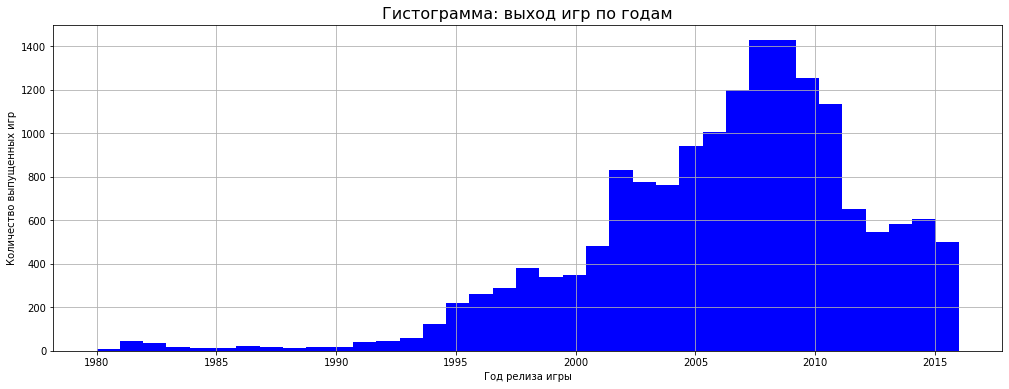

In [20]:
fig, ax = plt.subplots() #добавить действия для работы над фигурой и осями из библиотеки
ax.set_xlabel('Год релиза игры') #подпись оси х
ax.set_ylabel('Количество выпущенных игр') #подпись оси y

(
    df['year_of_release'] #столбец с данными
    .hist(bins=37, figsize=(17, 6), color='blue', grid=True) #гистограмма определенного размера, цвета и количества корзин
    .set_title('Гистограмма: выход игр по годам', fontsize = 16, color = 'Black') #название гистограммы и его оформление
);
display(df['year_of_release'].describe()); #описание данных

Как видно из гистограммы, выпуск игр до 1991 года был редким. Эти данные можно считать аномальными. Конечно, был период всплеска в 1981-1983 годах, но эти данные уже точно не будут актуальными для дальнейшего анализа в виду изменения индустрии (в те годы она только зарождалась), смены большого числа поколений платформ и т.д.

Можем сказать, что и более поздние релизы игр уже не актуальны для анализа текущего рынка, но их убрать мы уже не можем себе позволить в связи с тем, что потеряем очень много данных.

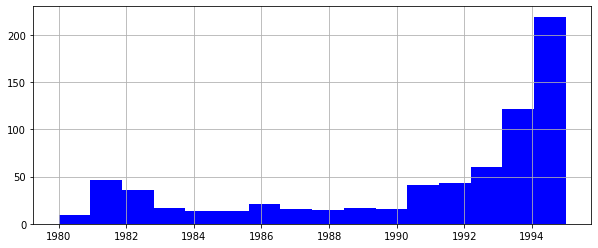

In [21]:
ax.set_xlabel('Год релиза игры') #подпись оси х
ax.set_ylabel('Количество выпущенных игр') #подпись оси y

df['year_of_release'].hist(bins=16, figsize=(10, 4), range=(1980, 1995), color='blue', grid=True);
#гистограмма определенного размера, цвета и количества корзин, с определенным диапазоном значений по х.

In [22]:
df = df.query('year_of_release >= 1991').reset_index(drop=True) #убираем из датасета строки с играми, вышедшими до 1991 года

count    16223.000000
mean      2006.787524
std          5.301364
min       1991.000000
25%       2003.000000
50%       2008.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

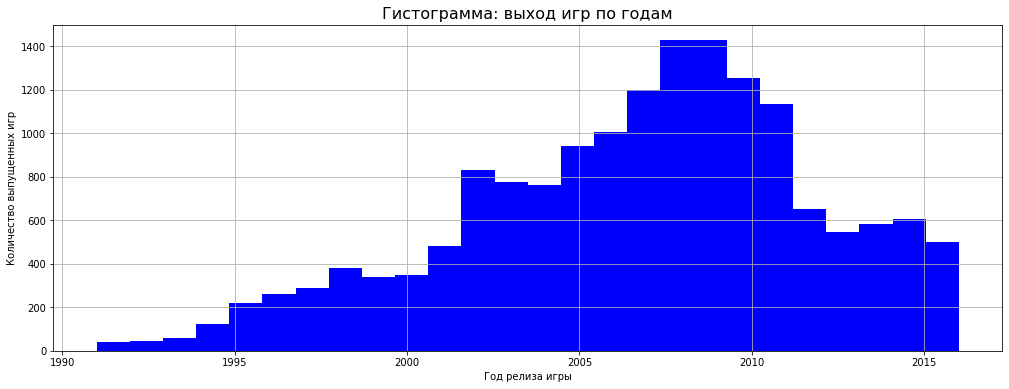

In [23]:
fig, ax = plt.subplots() #добавить действия для работы над фигурой и осями из библиотеки
ax.set_xlabel('Год релиза игры') #подпись оси х
ax.set_ylabel('Количество выпущенных игр') #подпись оси y

(
    df['year_of_release'] #столбец с данными
    .hist(bins=26, figsize=(17, 6), color='blue', grid=True) #гистограмма определенного размера, цвета и количества корзин
    .set_title('Гистограмма: выход игр по годам', fontsize = 16, color = 'Black') #название гистограммы и его оформление
);
display(df['year_of_release'].describe()); #описание данных

### Продажи по платформам

Сгруппируем данные в таблицу по платформам и отсортируем суммарные продажи игр для каждой:

In [24]:
platform_sales = (
    pd.pivot_table(
        df, index=['platform'], values=['world_sales'], aggfunc='sum') #сводная таблица по платформам и сумме продаж игр к ним
    .sort_values(by='world_sales', ascending=False) #с сортировкой по убыванию продаж
)

In [25]:
platform_first_year = (
    pd.pivot_table(
        df, index=['platform'], values=['year_of_release'], aggfunc='min')
) #сводная таблица по платформам и первому году продаж игр

In [26]:
df_sales_first_year = platform_sales.merge(platform_first_year, on='platform', how='left') 
#присоединение таблицы методом .merge(). совпадение строк по платформе, присоединение слева.

In [27]:
df_lifetime = df.groupby('platform')['year_of_release'].max() - df.groupby('platform')['year_of_release'].min()
#находим приблизительное время жизни каждой (сгруппированно) консоли (от первой игры до последней с датасете)

In [28]:
platform_sales = df_sales_first_year.merge(df_lifetime, on='platform', how='left') #присоединение таблицы методом .merge()
#совпадение строк по платформе, присоединение слева.

In [29]:
platform_sales = platform_sales.rename( #переименование столбцов, т.к. присоединялись с одинаковыми именами столбцов
    columns={'year_of_release_x': 'first_year',
             'year_of_release_y': 'lifetime'}
)
platform_sales

,world_sales,first_year,lifetime
platform,,,
PS2,1233.56,2000,11
X360,961.24,2005,11
PS3,931.34,2006,10
Wii,891.18,2006,10
DS,802.76,2004,9
PS,727.58,1994,9
PS4,314.14,2013,3
GBA,312.88,2000,7
PSP,289.53,2004,11


Рассмотрим 6 самых популярных консолей (между 6 и 7 местом разница по продажам в два раза, а между 5 и 6 - всего около 10%, именно поэтому рассмотрим 6 консолей).

Для каждого устройства построим графики и посмотрим на измение продаж. Выведем 6 лидеров продаж:

In [30]:
platform_sales.head(6)

,world_sales,first_year,lifetime
platform,,,
PS2,1233.56,2000,11
X360,961.24,2005,11
PS3,931.34,2006,10
Wii,891.18,2006,10
DS,802.76,2004,9
PS,727.58,1994,9


Начнем по порядку. Посмотрим, как распределены продажи от лидера, в сторону уменьшения числа продаж.

#### Продажи игр PS2

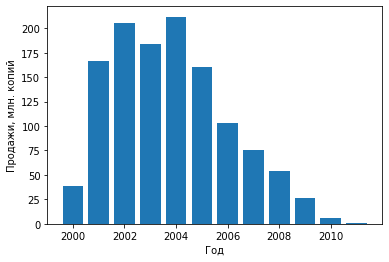

In [31]:
lead_ps2 = pd.DataFrame(df.loc[df['platform'] == 'PS2'].groupby('year_of_release')['world_sales'].sum())
#создаем сгруппированный по годам срез из определенной платформы, показывающий суммарные продажи игр

fig, ax = plt.subplots()
ax.set_xlabel('Год') #подписываем оси 
ax.set_ylabel('Продажи, млн. копий') #подписываем оси 
ax.bar(lead_ps2.index, lead_ps2['world_sales']); #столбчатая диаграмма продаж / год

Распределение, с небольшими погрешностями, достаточно точно соответствует нормальному распределению, немного смещенному влево (распределение Пуассона).

#### Продажи игр X360

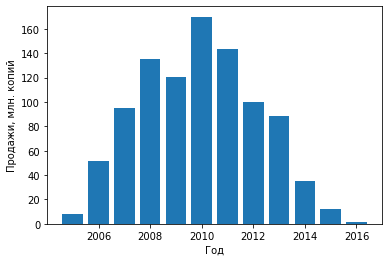

In [32]:
lead_X360 = pd.DataFrame(df.loc[df['platform'] == 'X360'].groupby('year_of_release')['world_sales'].sum())
#создаем сгруппированный по годам срез из определенной платформы, показывающий суммарные продажи игр

fig, ax = plt.subplots()
ax.set_xlabel('Год') #подписываем оси 
ax.set_ylabel('Продажи, млн. копий') #подписываем оси 
ax.bar(lead_X360.index, lead_X360['world_sales']); #столбчатая диаграмма продаж / год

Аналогичная ситуация - нормальное распределение. Пик продаж приходится на середину жизненного цикла. На старте - малое количество продаж. Это можно объяснить тем, что:
- Консоли выходят не в начале года, это может повлиять на абсолютные значения продаж по первому году,
- Консоли выходят ограниченным тиражом. Пользователь обычно не покупает игру, не имея консоли,
- Люди ждут новой ревизии, или обзоров устройств, для того, чтобы минимизировать риски.

Малое количество продаж также имеется в конце цикла, опять же, на это может влиять:
- Прекращение поддержки устройства,
- Прекращение выпуска игр на платформу,
- Прекращение производства новых устройств.

*Это применимо почти ко всем видам платформ.*

#### Продажи игр PS3

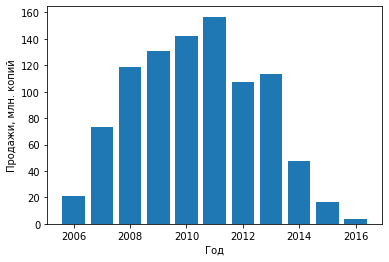

In [33]:
lead_PS3 = pd.DataFrame(df.loc[df['platform'] == 'PS3'].groupby('year_of_release')['world_sales'].sum())
#создаем сгруппированный по годам срез из определенной платформы, показывающий суммарные продажи игр

fig, ax = plt.subplots()
ax.set_xlabel('Год') #подписываем оси 
ax.set_ylabel('Продажи, млн. копий') #подписываем оси 
ax.bar(lead_PS3.index, lead_PS3['world_sales']); #столбчатая диаграмма продаж / год

#### Продажи игр Wii

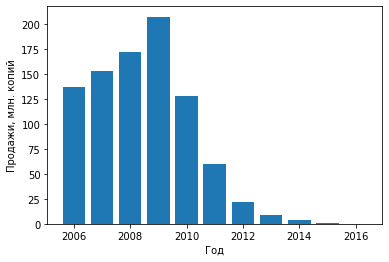

In [34]:
lead_Wii = pd.DataFrame(df.loc[df['platform'] == 'Wii'].groupby('year_of_release')['world_sales'].sum())
#создаем сгруппированный по годам срез из определенной платформы, показывающий суммарные продажи игр

fig, ax = plt.subplots()
ax.set_xlabel('Год') #подписываем оси 
ax.set_ylabel('Продажи, млн. копий') #подписываем оси 
ax.bar(lead_Wii.index, lead_Wii['world_sales']); #столбчатая диаграмма продаж / год

Диаграмма для Wii смещена, справа есть "хвост". Может объясняться тем, что в последние 3-4 года консоль находилась в состоянии "кроссгена" с новой консолью. То есть игры выходили на оба поколения консолей, и на старое поколение игры покупались все реже. 

Какой бы ни была причина, данные мы не будем трогать, т.к. они относятся к актуальной информации и, возможно, пригодятся нам для прогноза на 2017 год.

#### Продажи игр DS

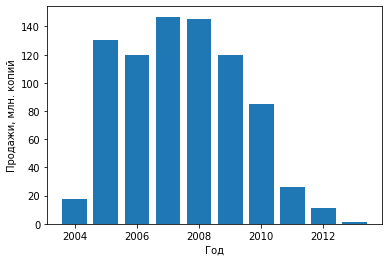

In [35]:
lead_DS = pd.DataFrame(df.loc[df['platform'] == 'DS'].groupby('year_of_release')['world_sales'].sum())
#создаем сгруппированный по годам срез из определенной платформы, показывающий суммарные продажи игр

fig, ax = plt.subplots()
ax.set_xlabel('Год') #подписываем оси 
ax.set_ylabel('Продажи, млн. копий') #подписываем оси 
ax.bar(lead_DS.index, lead_DS['world_sales']); #столбчатая диаграмма продаж / год

#### Продажи игр PS

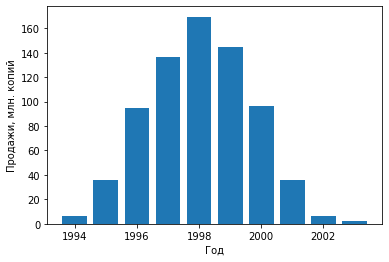

In [36]:
lead_PS = pd.DataFrame(df.loc[df['platform'] == 'PS'].groupby('year_of_release')['world_sales'].sum())
#создаем сгруппированный по годам срез из определенной платформы, показывающий суммарные продажи игр

fig, ax = plt.subplots()
ax.set_xlabel('Год') #подписываем оси 
ax.set_ylabel('Продажи, млн. копий') #подписываем оси 
ax.bar(lead_PS.index, lead_PS['world_sales']); #столбчатая диаграмма продаж / год

Практически симметричное нормальное распределение.

#### Выводы по лидерам продаж

Сделаем небольшой вывод по лидерам продаж: 
- все консоли в гистограммах продаж имеют нормальное или близкое к нему распределение,
- самое большое число продаж приходистя на середину жиненного цикла,
- средний жизненный цикл консоли от старта продаж до прекращения - 10 лет.

Все это может означать, что все эти консоли прошли путь от запуска / старта продаж до прекращения поддержки / производства игр к ним (или близки к этому).

### Жизненный цикл консоли

In [37]:
def pass_value_barh(platform_sales):  #
    try:
        (
            (platform_sales['lifetime'].to_frame().sort_values(by = 'lifetime', ascending = True)
             .plot(kind= 'barh', figsize=(19,10), rot = 0, legend = False, fontsize = 14, color = 'Blue', grid=True)
            .set_title('Длительность жизненного цикла, лет' + "\n", fontsize = 20))    
        );    
    except:
        print('')

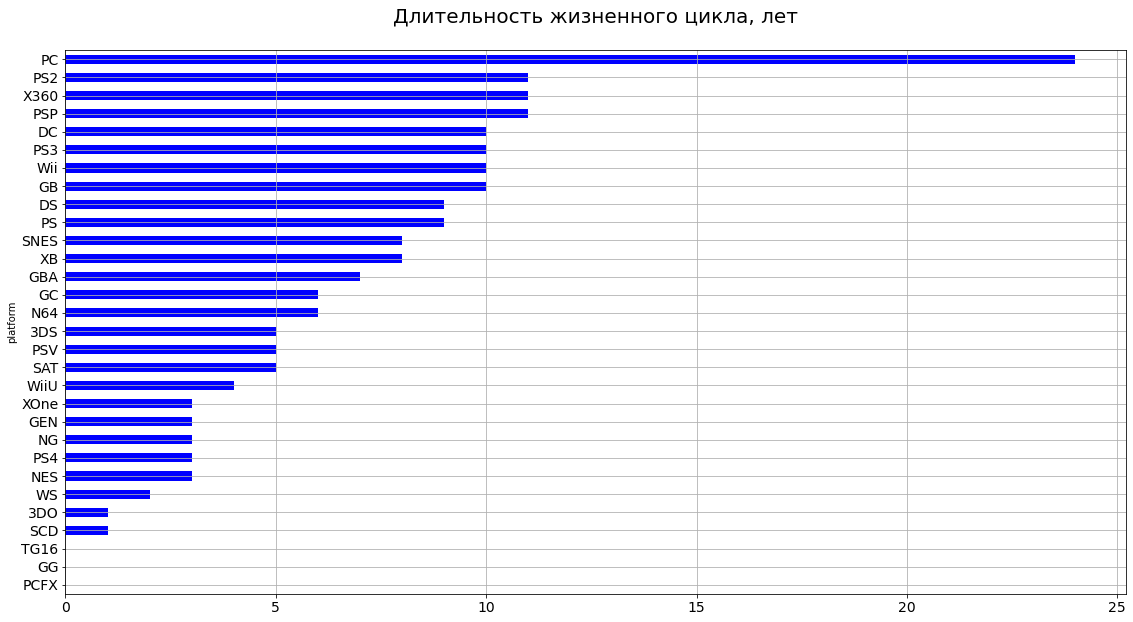

In [38]:
pass_value_barh(platform_sales)

Не имеет смысла смотреть на жизненный цикл персональных компьютеров, т.к. это не одно устройство, как, например, PS3, а сотни и тысячи вариаций нового и старого железа разных конфигураций и актуальности. Также, помимо железа, на ПК за это время могло смениться десяток операционных систем. Поэтому на гистограмме ниже мы его не отображаем.

Для гистограммы, показывающей длительность цикла консоли исключим те, для которых выходят игры в 2016 году (т.к. эти платформы еще не отслужили свое, скорее всего). Также исключим консоли с 0 лет, т.к. это явно исказит оценку.

In [39]:
platform_last_year = (pd.pivot_table(df, index=['platform'], values=['year_of_release'], aggfunc='max'))
# находим значение последнего года продаж игр для каждой платформы
platform_sales = platform_sales.merge(platform_last_year, on='platform', how='left') #присоединяем к сводной таблице
platform_sales = platform_sales.rename(columns={'year_of_release': 'last_year'}) #переименовываем столбец


platform_sales_arch = platform_sales.query('last_year < 2016 and lifetime > 0')

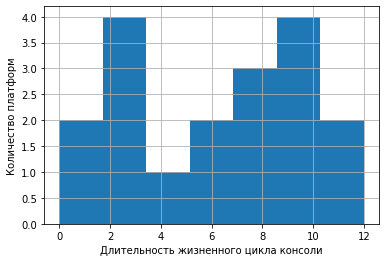

In [40]:
fig, ax = plt.subplots()
ax.set_xlabel('Длительность жизненного цикла консоли')
ax.set_ylabel('Количество платформ')

platform_sales_arch['lifetime'].hist(bins=7, range=(0, 12)); #фильтрация по консоли и подсчет проданных копий игр

Из гистограммы выше мы видим:
- Есть два четких пика на 2-3 и 9-10 годах. Из опыта мы знаем, что актуальность платформы сейчас - около 7-8 лет. Но после выхода нового поколения, констоли поддерживаются еще 2-3 года (на них продолжают выходить игры). Что касается пика на 2-3 года: все эти консоли из старых времен, когда индустрия была другой. Следовательно, для дальнейших прогнозов берем длительность жизненного цикла в 9 лет.

### Актуальные платформы

В данном исследовании мы установили, что актуальность платформы длится около 9 лет. Чтобы построить прогноз на 2017 год, необходимо узнать, какие платформы будут актуальны на этот год. Для того, чтобы минимизировать искажения, те консоли, для которых 2017 год может, теоретически, стать последним, мы учитывать не будем. Т.к. мы не знаем, уйдет консоль в начеле года, или в конце.

In [41]:
platform_sales #выводим на экран

,world_sales,first_year,lifetime,last_year
platform,,,,
PS2,1233.56,2000,11,2011
X360,961.24,2005,11,2016
PS3,931.34,2006,10,2016
Wii,891.18,2006,10,2016
DS,802.76,2004,9,2013
PS,727.58,1994,9,2003
PS4,314.14,2013,3,2016
GBA,312.88,2000,7,2007
PSP,289.53,2004,11,2015


Добавим столбец `hypothetical_last_year`, значения которого:
- Если жизненный цикл меньше 9 лет, то к начальной дате прибавляем 9 лет,
- Если жизненный цикл больше или равен 9, то оставляем без изменений. 

In [42]:
for i in platform_sales['lifetime']: #для каждого элемента в длительности жизненного цикла
    if i < 9: #если этот элемент < 9
        platform_sales['hypothetical_last_year'] = platform_sales['first_year'] + 9 #тогда выводим в новый столбец измененное значение
platform_sales.query('last_year == 2016').sort_values(by='hypothetical_last_year', ascending=False)
#вывод тех значений, для которых последняя дата продаж была в 2016 (то есть фактически актуальные) и сортировка по гипотетической дате конца актуальности

,world_sales,first_year,lifetime,last_year,hypothetical_last_year
platform,,,,,
PS4,314.14,2013,3,2016,2022
XOne,159.32,2013,3,2016,2022
WiiU,82.19,2012,4,2016,2021
3DS,257.81,2011,5,2016,2020
PSV,53.81,2011,5,2016,2020
PS3,931.34,2006,10,2016,2015
Wii,891.18,2006,10,2016,2015
X360,961.24,2005,11,2016,2014
PC,255.69,1992,24,2016,2001


#### PC

Из таблицы выше (а также на основе суждений об актуальности платформы) можно сделать выводы:
- Про ПК мы уже говорили. Он не теряет своей актуальности, т.к. постоянно обновляется. Фактически, это не одна платформа, а комбинация тысяч под одним именем. 

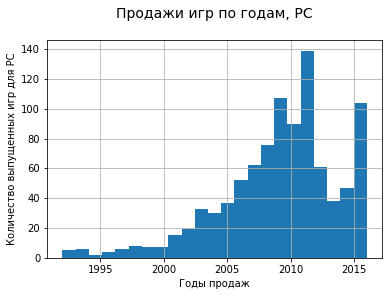

In [43]:
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество выпущенных игр для PC')

df.loc[(df['platform'] == 'PC'), 'year_of_release']\
.hist(bins=23).set_title('Продажи игр по годам, PC' + "\n", fontsize = 14);
#фильтрация по консоли и подсчет проданных копий игр

#### X360, Wii и PS3

- Для PS3, Wii и X360, несмотря на актуальность на 2016 год, не приходится говорить об актуальности на 2017 год. Возможно, какие-то игры все же на них выйдут, а возможно - нет. Точно можно сказать, что их актуальность точно упадет относительно предыдущего, 2016-го, года. Гистограммы показывают, что популярность консолей уже давно падает.

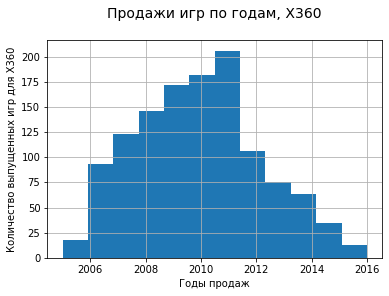

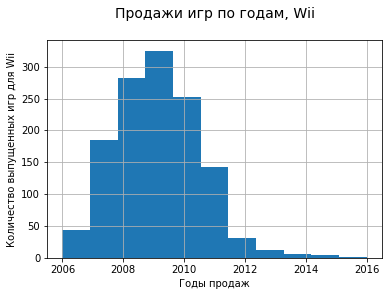

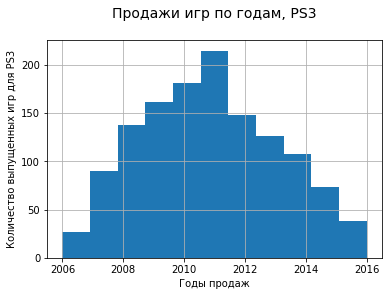

In [44]:
#X360
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество выпущенных игр для X360')
df.loc[(df['platform'] == 'X360'), 'year_of_release']\
.hist(bins=12).set_title('Продажи игр по годам, X360' + "\n", fontsize = 14);
#фильтрация по консоли и подсчет проданных копий игр

#Wii
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество выпущенных игр для Wii')
df.loc[(df['platform'] == 'Wii'), 'year_of_release']\
.hist(bins=11).set_title('Продажи игр по годам, Wii' + "\n", fontsize = 14);

#PS3
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество выпущенных игр для PS3')
df.loc[(df['platform'] == 'PS3'), 'year_of_release']\
.hist(bins=11).set_title('Продажи игр по годам, PS3' + "\n", fontsize = 14);

Теперь рассмотрим платформы, для которых еще не прошел усредненный срок актуальности на 2016-й год. Сначала построим гистограммы для каждой платформы и попробуем объяснить смысл.

#### PSV

Для начала напоминание из условий, указанных для проекта: `Данные за 2016 год могут быть неполными.`. Значит они могут нам показать верную, либо искаженную характеристику, поэтому ссылаться на 2016 год в прогнозе не будем.

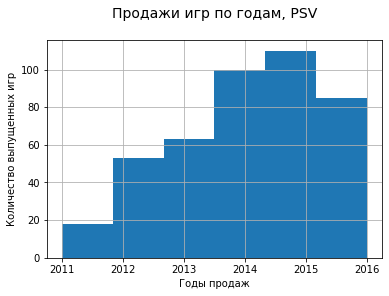

In [45]:
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество выпущенных игр')

df.loc[(df['platform'] == 'PSV'), 'year_of_release'].hist(bins=6).set_title('Продажи игр по годам, PSV' + "\n", fontsize = 14); 
#фильтрация по консоли и подсчет проданных копий игр

Как видно из гистограммы, платформа PSV набирает популярность (искл. 2016), а учитывая, что она находится на середине жизненного цикла, то имеет смысл сказать, что в 2016 или 2017 продажи игр для консоли пойдут на спад, но не прекратятся.

#### 3DS

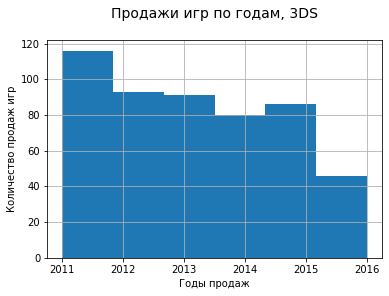

In [46]:
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество продаж игр')

df.loc[(df['platform'] == '3DS'), 'year_of_release'].hist(bins=6).set_title('Продажи игр по годам, 3DS' + "\n", fontsize = 14); 
#фильтрация по консоли и подсчет проданных копий игр

Из гистограммы выше следует, что самый удачный год для 3DS, исходя из количества проданных копий игр - год ее запуска. Это нетипичная иллюстрация данных, но возможно, дело в обширной библиотеке игр на старте или в желании поклонником смены предыдущего поколения консоли новым. В остальных годах, если усреднять, гистограмма идет вниз, а следовательно, ожидать больших продаж в 2017 году не стоит. К тому же консоль находится в середине усредненного жизненного цикла, что только подтверждает утверждение выше.

#### WiiU

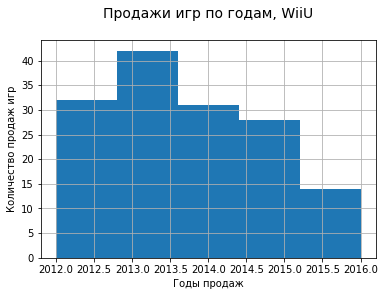

In [47]:
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество продаж игр')

df.loc[(df['platform'] == 'WiiU'), 'year_of_release'].hist(bins=5).set_title('Продажи игр по годам, WiiU' + "\n", fontsize = 14); 
#фильтрация по консоли и подсчет проданных копий игр

WiiU тоже прошла пик своей популярности, не стоит ожидать больших продаж на 2017 год. К тому же, жизненный цикл этой консоли намного меньше средних 10 лет.

#### XOne

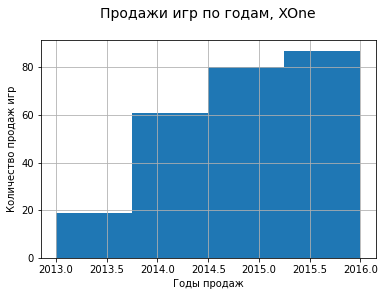

In [48]:
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество продаж игр')

df.loc[(df['platform'] == 'XOne'), 'year_of_release'].hist(bins=4).set_title('Продажи игр по годам, XOne' + "\n", fontsize = 14); 
#фильтрация по консоли и подсчет проданных копий игр

Другую картину можно наблюдать с XOne. Консоли только 3 года, и она только набирает популярность. Она не перевалила за отметку середины жизненного цикла. Данные даже за неполный 2016 год говорят, что этот год является лидером продаж среди игра для этой платформы. 

Исходя из всего вышеперечисленного можно прогнозировать на 2017 год рост популярности и рост продаж игр.

#### PS4

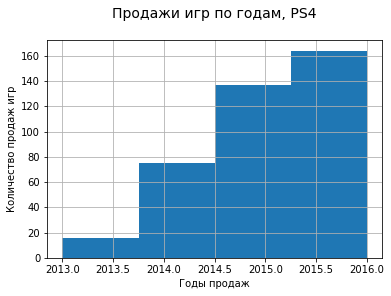

In [49]:
fig, ax = plt.subplots()
ax.set_xlabel('Годы продаж')
ax.set_ylabel('Количество продаж игр')

df.loc[(df['platform'] == 'PS4'), 'year_of_release'].hist(bins=4).set_title('Продажи игр по годам, PS4' + "\n", fontsize = 14); 
#фильтрация по консоли и подсчет проданных копий игр

Для PS4 ситуация абсолютно ничем не отличается от XOne, только абсолютные показатели продаж выше. Прогноз на 2017 год - рост популярности и рост продаж игр на платформу.

#### Выводы об актуальности платформ

Учитывая данные, полученные в этом разделе, мы имеем:
- PS3, Wii и X360, которые номинально являются актуальными, но уже находятся на завершающей стадии жизненного цикла с уменьшением продаж последние несколько лет. Следовательно, мы не будем рассматривать их как актуальные с потенциальной прибыльностью в будущем;
- PC - не теряет актуальности, нужно учитывать;
- PSV - прибыльность идет вверх (за исключением 2016 года, который может иметь неполные данные), консоль - актуальная;
- 3DS и WiiU - продажи игр для этих консолей идут на спад, но они находятся в середине гипотетического жизненного цикла и не имеют ярко выраженного спада продаж. Эти консоли все еще актуальны;
- XOne и PS4 - это абсолютно точно актуальные консоли, это показывают гистограммы с растущими продажами и выпуском игр.

Все остальные консоли уже совершенно точно не актуальны. Актуальные платформы:
- `PC`
- `PS4`
- `XOne`
- `WiiU`
- `PSV`
- `3DS`

#### Актуальный период времени

Чтобы прогнозировать продажи на 2017 год, мы должны ввести актуальный период.

Учитывая, что выше мы нашли актуальные платформы, можно предположить, что актуальный период времени будет начинаться с начальных продаж по платформам, но, во-первых, ПК актуален с 80-90-х годов, когда ничего остального еще не было, а, например, WiiU и PSV появились на несколько лет раньше самых молодых платформ.

Предлагаю, ввести актуальный период времени с 2013 года, т.к:
- в этот год появились самые последние консоли, а значит, начиная с этого года, будут данные обо всех актуальных платформах,
- не будет лишней и бесполезной информации. Т.к. игровая индустрия очень молодая, она очень быстро именяется.

Далее в работе мы рассматриваем только актуальный временной период (т.е. с данными, которые включают как актуальные платформы, так и все остальные, с условием, что рассматриваются платформы с выпускаемыми с 2013 года, и после, играми). Введем датасет `df_actual`, и будем далее работать с ним.

In [50]:
df_actual = df.query('year_of_release >= 2013')
#применяем условие для отбора подходящих данных

### Лидеры продаж, рост / падение продаж

In [51]:
df_actual_pivot = df_actual.pivot_table(
    index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
    #сводная таблица: суммарные продажи игр платформ по годам
df_actual_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


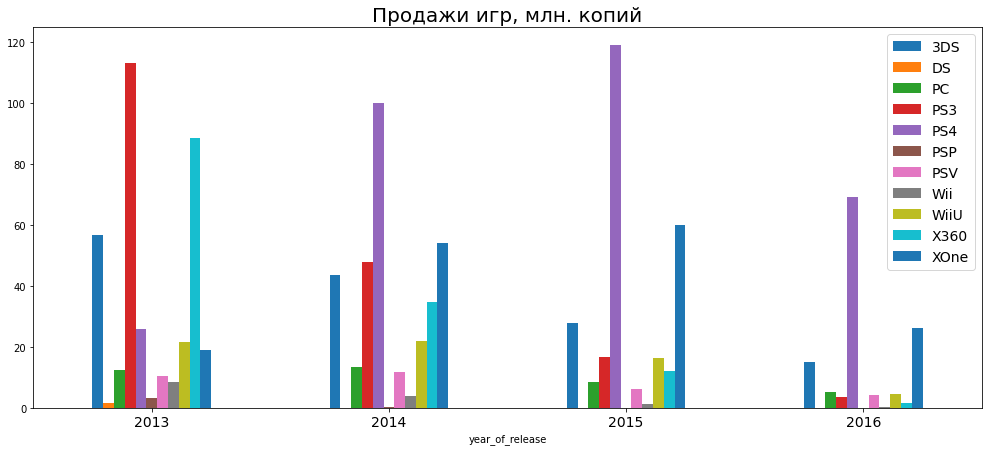

In [52]:
df_actual_pivot.plot(kind='bar', figsize=(17, 7)) #столб.диаграмма по сводной таблице с указанным размером
bw = 0.5 #толщина столбика
plt.title('Продажи игр, млн. копий', fontsize=20) #имя графика
plt.xticks(fontsize=14, rotation=0) #показать подпись, убрать поворот
plt.legend(fontsize=14); #показать легенду

Итак, исходя из диаграммы следует:
- В 2013 году лидером рынка была PS3, немного отставал от нее X360. Далее их популярность пошла на спад.
- С 2014 года в лидеры вырывается платформа PS4 и остается лидером. Продажи растут и у XOne (помним, данные за 2016 год могут быть неполными);
- Для 3DS с 2013 года продажи падают каждый год, но он все еще занимает значительную часть рынка;
- Продажи игр на PC, PSV, WiiU падают, и в целом их продажи на фоне лидеров - незначительны;
- Продажи для DS, PSP, Wii каждый год падают, причем опускаются до нулевых или околонулевых показателей.

### Ящик с усами

Для наглядности сравнения продаж по платформам можем построить общий график ящиков для вех платформ:

In [53]:
df_barplot_pivot = df_actual.pivot_table(
    columns='platform', index='name', values='world_sales', aggfunc='sum') #собираем сводную таблицу для построения общего ящика

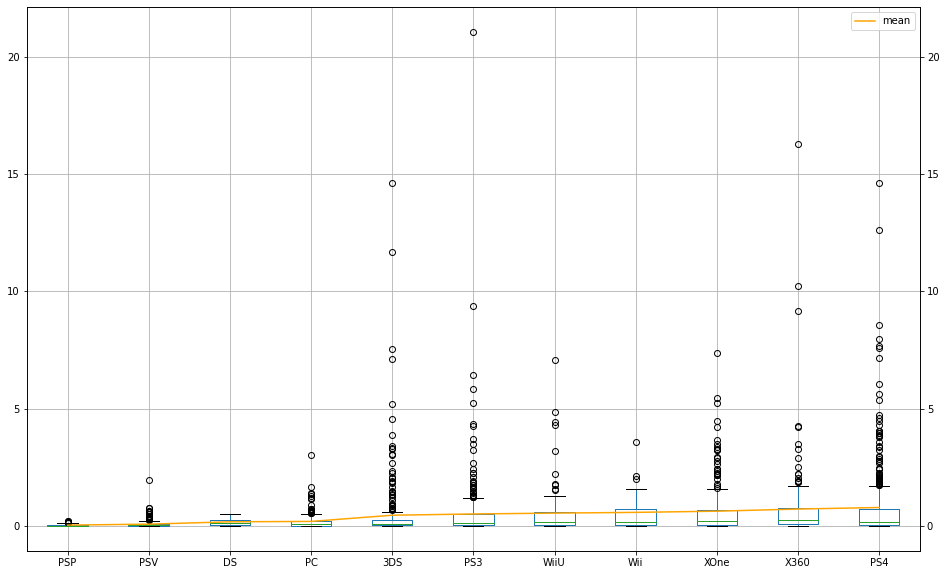

In [54]:
idx = df_barplot_pivot.mean().sort_values().index #упорядочивание платформ в порядке возрастания среденего
df_barplot_pivot = df_barplot_pivot[idx] #присвоить таблице упорядоченный вид

fig, ax = plt.subplots(figsize=(16,10)) #св-ва графика

df_barplot_pivot.plot.box(rot=0, ax=ax, grid=True) #ящики с подписью без вращения
ax2 = ax.twinx() #создание второй оси
ax2.plot(ax.get_xticks(), df_barplot_pivot.mean(), color='orange') #график средней
ax2.set_ylim(ax.get_ylim()) #задание лимитов по оси y в соответствии с ящиками с усами
plt.legend(['mean']); #легенда

Мы построили общую диаграмму размаха по актуальным данным без ограничения по высоте. То есть мы можем наблюдать выбросы для каждой отдельной платформы. Это помогает нам понять, что у многих платформ есть, грубо говоря, бестселлеры, а некоторых их нет. 

Построим эту же диаграмму с ограничением, чтобы было лучше видно данные. 

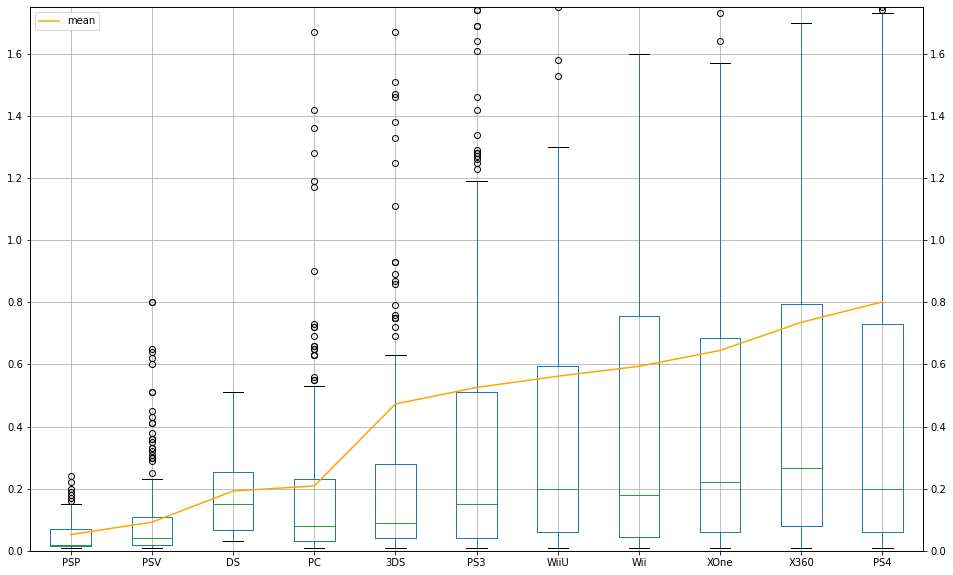

In [55]:
idx = df_barplot_pivot.mean().sort_values().index #упорядочивание платформ в порядке возрастания среденего
df_barplot_pivot = df_barplot_pivot[idx] #присвоить таблице упорядоченный вид

fig, ax = plt.subplots(figsize=(16,10)) #св-ва графика

df_barplot_pivot.plot.box(rot=0, ax=ax, grid=True) #ящики с подписью без вращения
ax.set_ylim(0,1.75)
ax2 = ax.twinx() #создание второй оси
ax2.plot(ax.get_xticks(), df_barplot_pivot.mean(), color='orange') #график средней
ax2.set_ylim(0,1.75) #задание лимитов по оси y в соответствии с ящиками с усами
plt.legend(['mean'], loc='upper left'); #легенда

Интересно, что у платформы DS совсем нет выбросов, но, вспоминая данные таблицы `df_actual_pivot`, можем прийти к выводу, что для этой платформы очень мало данных (т.к. игры на нее к актуальному периоду почти прекратили выпускать игры).

Также можно отметить, что для платформ 3DS, PS3 и PS4 среднее значение превышает не только медиану, но и сам ящик - значения от первого до третьего квартиля включительно.

#### Выводы

Из диаграмм размаха следует, что в данных имеются аномально большие выбросы по продажам, причем в разных платформах - это могут быть разные игры. Внизу аномалий нет, так как нижний порог продаж почти равен нулю.

В этой работе бороться с аномально большими значениями актуальных платформ нельзя, т.к. это исказит данные. Т.е. если убрать, скажем, одну Call of Duty: Black Ops 3 или Grand Theft Auto V	в PS4, то платформа лишится 15 или 13 миллионов проданных копий игр. Это может привести к тому, что потенциально прибыльная консоль по прогнозу сможет пойти, например, в уменьшение продаж игр.

In [56]:
df_actual_PS4 = df_actual.loc[df_actual['platform'] == 'PS4'] #фильтр по платформе
df_actual_PS4.sort_values(by='world_sales', ascending=False).head() #вывод пяти первых по мировым продажам значений

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
25,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,n/a,14.63
36,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
71,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
81,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,n/a,7.98
85,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


### Влияние отзывов на продажи

Для примера рассмотрим самую популярную платформу PS4.

In [57]:
df_actual_PS4_critic = df_actual.query('platform == "PS4" and critic_score >=0') 
#фильтр по существующим оценкам и платформе
df_actual_PS4_user = df_actual.query('platform == "PS4" and user_score >=0') 

0.40656790206178095

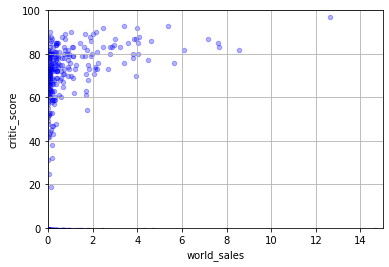

In [59]:
display(df_actual_PS4_critic['critic_score'].corr(df_actual_PS4_critic['world_sales'])) #отобразить корреляцию

ax = df_actual_PS4.plot(x='world_sales', y='critic_score', #по фильтру, по х - мировые продажи, по у - оценки критиков
          kind='scatter', grid=True, xlim=(0,15), ylim=(0,100), #вид - диаг. рассеяния, сетка, пределы по осям
          alpha=0.3, c='b') #прозрачность, цвет

Корреляция между оценками критиков и продажами слабая, положительная. Это значит, что, как правило, при увеличении оценки от критика вероятность увеличения числа проданных копий - ненулевая.

Хоть отчетливой зависимости нет, но на диаграмме рассеяния мы можем увидеть, что при оценках ниже 60 баллов бестселлеров нет, в тоже время все бестселлеры (или игры, просто проданные высокими тиражами) имеют оценку более 60 баллов, в среднем - 80.

-0.031957110204556376

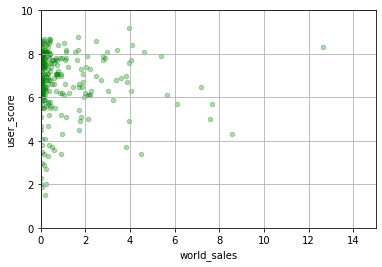

In [60]:
display(df_actual_PS4_user['user_score'].corr(df_actual_PS4_user['world_sales'])) #отобразить корреляцию

ax = df_actual_PS4.plot(x='world_sales', y='user_score', #по фильтру, по х - мировые продажи, по у - оценки пользователей
          kind='scatter', sharex=False, grid=True, xlim=(0,15), ylim=(0,10), #вид - диаг. рассеяния, сетка, пределы по осям
          alpha=0.3, c='g') #прозрачность, цвет

Корреляция между оценкой игроков и продажами - нулевая, в пределах погрешности. Это значит, что оценки игроков никак не влияют на продажи игр.

#### Корреляция между отзывами критиков и продажами

При таких значениях корреляции на самой популярной платформе нужно понимать, что на остальных платформах картина будет примерно такая же. 

Посмотрим на корреляцию всех платформ всместе.

In [61]:
df_actual_score_critic = df_actual.query('critic_score >= 0') #фильтр данных для оценок (с существующими оценками)

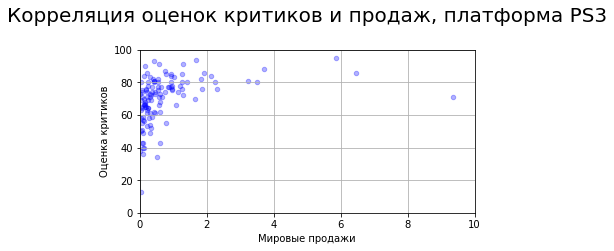

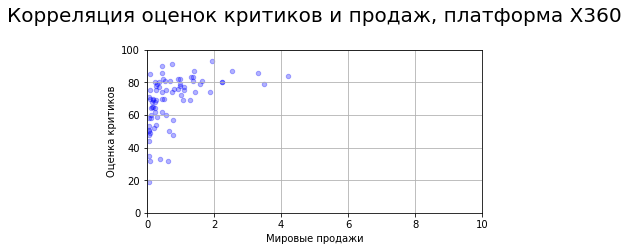

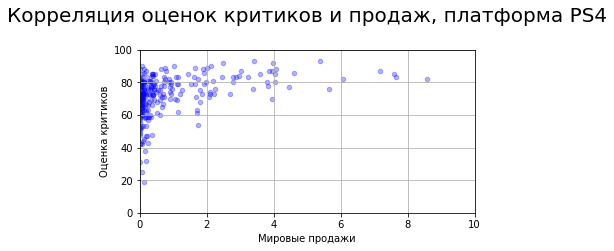

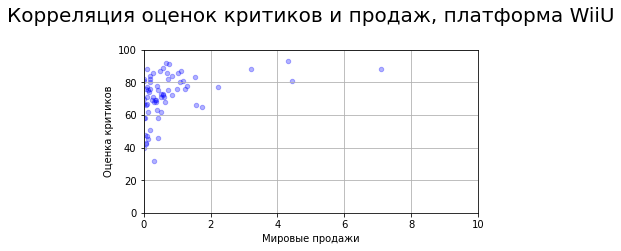

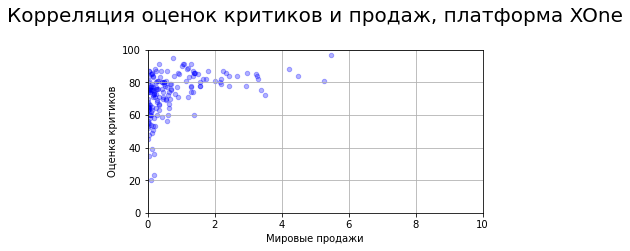

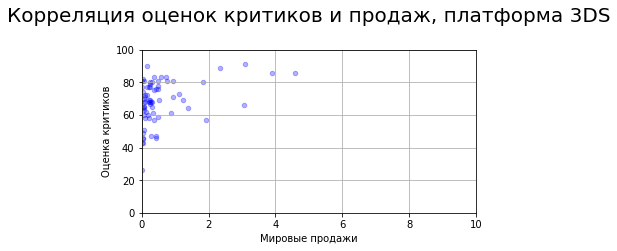

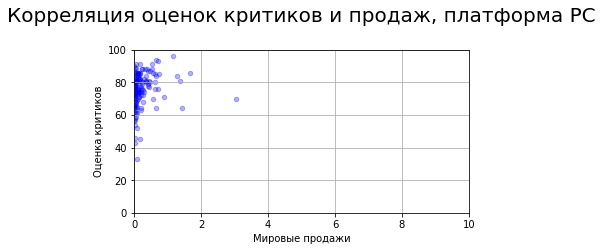

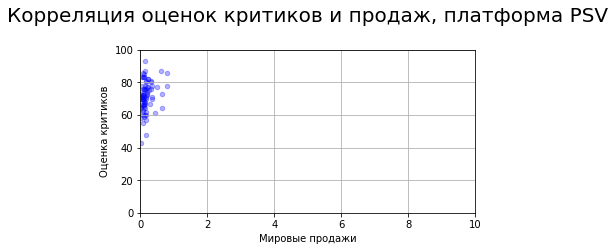

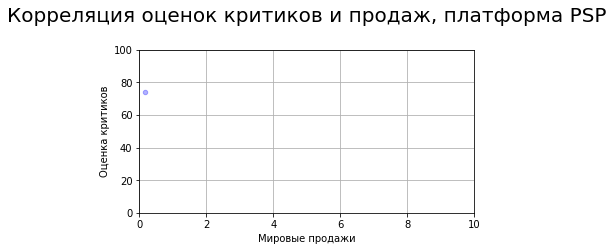

In [62]:
df_actual_list_platform_critic = list(df_actual_score_critic['platform'].unique()) #список уникальных платформ

corr_critic_list = [] #список корреляций

for platform in df_actual_list_platform_critic: #для каждого в списке платформ
    grouped_platform = df_actual_score_critic.loc[(df_actual_score_critic['platform'] == platform)] #группируем по платформе
    corr_critic = grouped_platform['critic_score'].corr(grouped_platform['world_sales']) #считаем корреляцию
    corr_critic_list.append(corr_critic) #заполняем список
    
    ax = grouped_platform.plot(x='world_sales', y='critic_score', #по фильтру, по х - мировые продажи, по у - оценки критиков
          kind='scatter', grid=True, xlim=(0,10), ylim=(0,100), #вид - диаг. рассеяния, сетка, пределы по осям
          alpha=0.3, c='b', figsize=(6,3)) #прозрачность, цвет
    ax.set_xlabel('Мировые продажи')
    ax.set_ylabel('Оценка критиков')
    plt.title(f'Корреляция оценок критиков и продаж, платформа {platform}\n', fontsize=20) #имя графика
    warnings.filterwarnings("ignore")

Посмотрим числовые значения корреляции для критиков:

In [63]:
corr_table_critic = pd.DataFrame() #создаем DF
corr_table_critic['corr_critic_list'] = corr_critic_list #первый столбец - корреляций по листу пользователей
corr_table_critic.index = df_actual_list_platform_critic #индексы по листу уникальных платформ
corr_table_critic #вывод

,corr_critic_list
PS3,0.334285
X360,0.350345
PS4,0.406568
WiiU,0.376415
XOne,0.416998
3DS,0.357057
PC,0.196030
PSV,0.254742
PSP,NaN


Для PSP при заданных условиях имеется только одна строка, корреляция не может быть рассчитана.

#### Корреляция между отзывами пользователей и продажами

In [64]:
df_actual_score_user = df_actual.query('user_score >= 0') #фильтр данных для оценок (с существующими оценками)

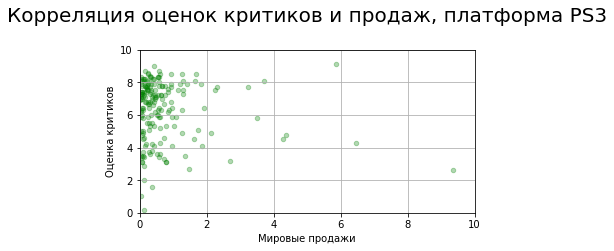

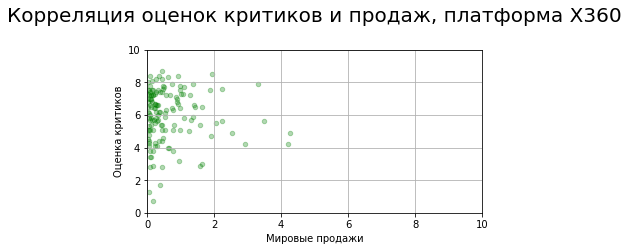

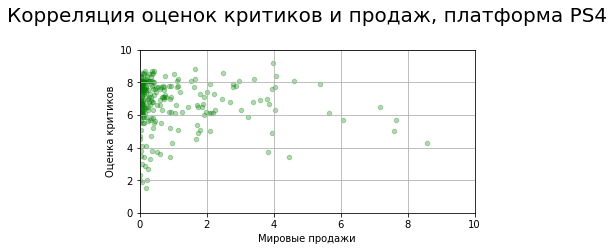

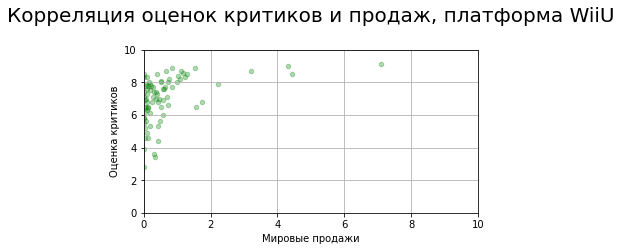

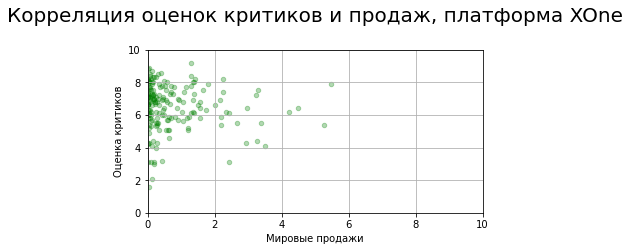

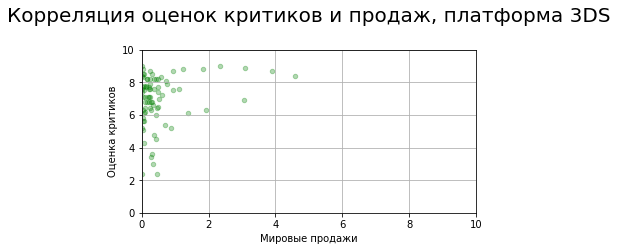

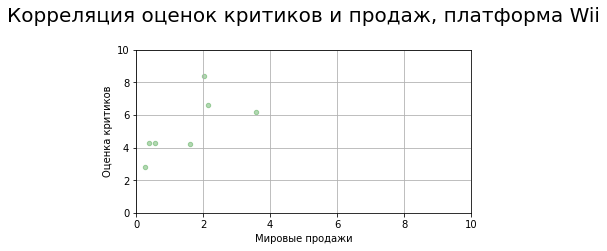

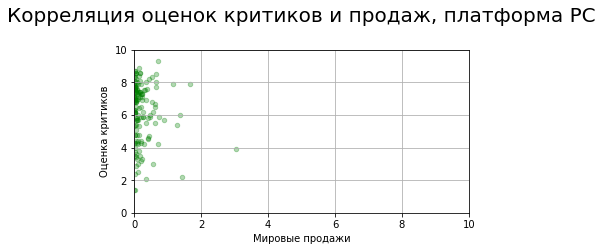

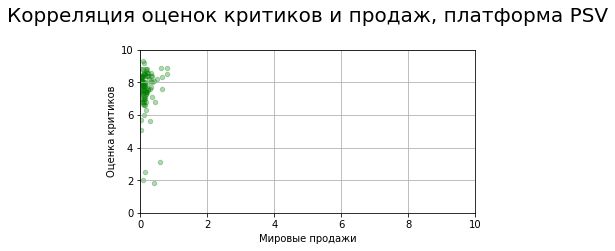

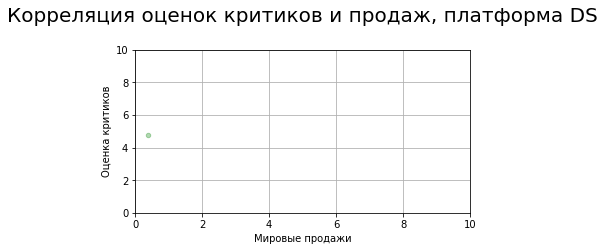

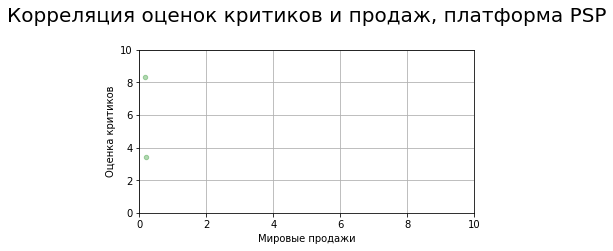

In [65]:
df_actual_list_platform_user = list(df_actual_score_user['platform'].unique()) #список уникальных платформ

corr_user_list = [] #список корреляций

for platform in df_actual_list_platform_user: #для каждого в списке платформ
    grouped_platform = df_actual_score_user.loc[(df_actual_score_user['platform'] == platform)] #группируем по платформе
    corr_user = grouped_platform['user_score'].corr(grouped_platform['world_sales']) #считаем корреляцию
    corr_user_list.append(corr_user) #заполняем список
    
    ax = grouped_platform.plot(x='world_sales', y='user_score', #по фильтру, по х - мировые продажи, по у - оценки критиков
          kind='scatter', grid=True, xlim=(0,10), ylim=(0,10), #вид - диаг. рассеяния, сетка, пределы по осям
          alpha=0.3, c='g', figsize=(6,3)) #прозрачность, цвет
    ax.set_xlabel('Мировые продажи')
    ax.set_ylabel('Оценка критиков')
    plt.title(f'Корреляция оценок критиков и продаж, платформа {platform}\n', fontsize=20) #имя графика
    
    warnings.filterwarnings("ignore")

In [66]:
corr_table_user = pd.DataFrame() #создаем DF
corr_table_user['corr_critic_list'] = corr_user_list #первый столбец - корреляций по листу пользователей
corr_table_user.index = df_actual_list_platform_user #индексы по листу уникальных платформ
corr_table_user #вывод

,corr_critic_list
PS3,0.002394
X360,-0.011742
PS4,-0.031957
WiiU,0.419330
XOne,-0.068925
3DS,0.241504
Wii,0.682942
PC,-0.093842
PSV,0.000942
DS,NaN


Для DS корреляция тоже не может быть рассчитана, т.к. по заданным условиям имеем одну строку кода. Другое дело с консолью PSV, с корреляцией = -1. Эта консоль содержит две строки данных, и так совпало, что игра, получившая больший рейтинг продалась меньшим тиражом. А могло быть наооборот. Корреляция из данных двух строк не может отражать реальную картину, этот показатель не учитываем.

In [67]:
df_actual.query('platform == "PSP" and user_score >= 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
7544,FIFA 14,PSP,2013,Sports,0.0,0.15,0.00,0.04,-1.0,3.4,E,0.19
8615,Summon Night 5,PSP,2013,Role-Playing,0.0,0.00,0.15,0.00,74.0,8.3,T,0.15


#### Выводы

В целом мы получили похожую картину для каждой платформы:

- Корреляция между оценками критиков всегда слабая положительная. Что это значит мы говорили на примере PS4: как правило, при увеличении оценки от критика вероятность увеличения числа проданных копий - ненулевая. Оценка критика немного влияет на продажи.
- Корреляция между оценкой игроков и мировыми продажами либо близка к нулю (в пределах погрешности), либо слабоположительная. Возможно, оценки игроков тоже влияют на продажи, но в меньшей степени, чем оценки критиков. Или вообще не влияют.
- Интересно, что отзывы игроков, возможно, влияют на продажи игр на платформах 3DS и WiiU. Несмотря на то, что для Wii корреляция средняя положительная, на графике видно, что данных для точной оценки недостаточно.

### Жанры

In [68]:
df_actual_genre = df_actual.pivot_table(
    index='genre', values=['world_sales'], aggfunc=[np.sum, len])
    #сводная таблица: суммарные продажи игр платформ по годам
df_actual_genre.columns = ['world_sales', 'count']
df_actual_genre = df_actual_genre.sort_values(by='world_sales', ascending=False)
df_actual_genre['ratio'] = df_actual_genre['world_sales'] / df_actual_genre['count']
df_actual_genre

,world_sales,count,ratio
genre,,,
Action,321.87,766.0,0.420196
Shooter,232.98,187.0,1.245882
Sports,150.65,214.0,0.703972
Role-Playing,145.89,292.0,0.499623
Misc,62.82,155.0,0.405290
Platform,42.63,74.0,0.576081
Racing,39.89,85.0,0.469294
Fighting,35.31,80.0,0.441375
Adventure,23.64,245.0,0.096490


Мы видим сильнейшую дифференциацию по жанрам. Экшенов самое большое количество, а, например, паззлов - очень мало.

Некоторые выводы:
- Самые прибыльные жанры - это `Action`, `Shooter`, `Sports` и т.д. Игры в таких жанрах с могум быть абсолютно разными внутри даже одного жанра. Популярность объясняется тем, что, например, практически любая игра может быть названа экшеном, если в ней есть какие-либо активные действия. Обычно, чем популярнее жанр, тем более размыты границы самого жанра. Несмотря на то, что среди жанров экшен занимает первое место по выручке, жанр далеко не самый прибыльный по отношению к одной копии игры (столбец `ratio`). С другой стороны шутеры имеют чуть более низкую выручку, но почти в 5 раз меньшее количество самих игр. Этим и объясняется столь высокое значение `ratio`.
- Самые непопулярные жанры - это стратегия и паззл. Это можно легко объяснить: стратегии сами по себе сложные, у них есть своя аудитория. Обычному игроку может быть сложно играть в игры этого жанра. Паззлы сами по себе требуют усидчивости, и они не настолько интересуют людей геймплейно. Плюс к этому, жанр паззл в основном обитает в смартфонах.

Для того, чтобы данные по продажам среди жанров были объективными, нужно найти медианные продажи. Это устранит выбросы и даст более точную оценку. 

In [69]:
df_actual_genre_median = df_actual.pivot_table(
    index='genre', values=['world_sales'], aggfunc=[np.median, len])
    #сводная таблица: суммарные продажи игр платформ по годам
df_actual_genre_median.columns = ['world_sales', 'count']
df_actual_genre_median = df_actual_genre_median.sort_values(by='world_sales', ascending=False)
df_actual_genre_median

,world_sales,count
genre,,
Shooter,0.450,187.0
Sports,0.240,214.0
Platform,0.225,74.0
Role-Playing,0.125,292.0
Fighting,0.125,80.0
Racing,0.120,85.0
Action,0.110,766.0
Simulation,0.100,62.0
Misc,0.100,155.0


Здесь мы  видим, что самые продаваемые жанры (без учетов выбросов) - это шутеры, спортивные игры и т.д.

А вот экшены опустились намного ниже в рейтинге. Это объясняется тем, что свехпопулярные игры не учитываются при рассмотрении медианы. То есть, именно в жанре экшен больше всего выбросов, среди всех жанров. Это можно проверить, построив диаграмму размаха для жанров.

Паззлы и приключенческие игры имеют наименьшие продажи.

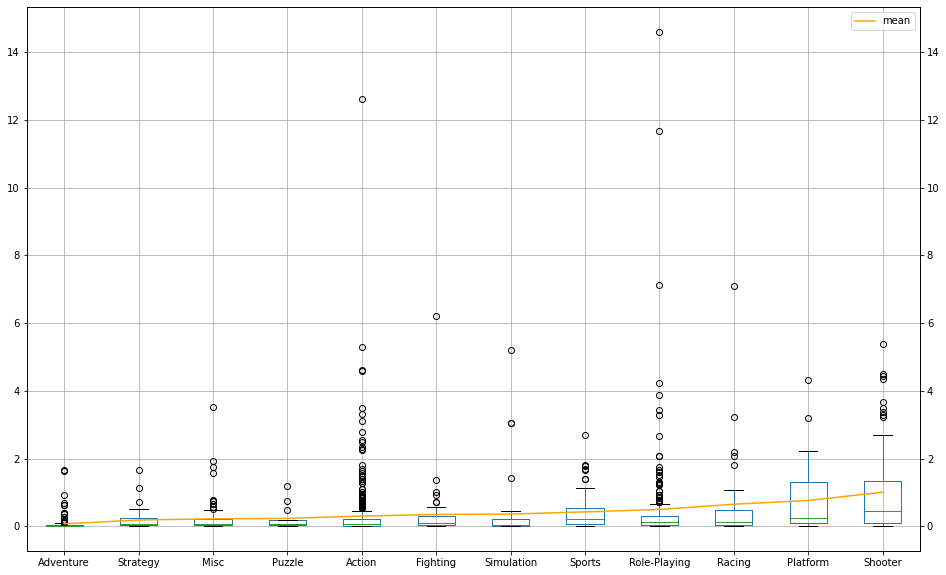

In [70]:
df_barplot_genre = df_actual.pivot_table(
    columns='genre', index='name', values='world_sales', aggfunc='median') #собираем сводную таблицу для построения общего ящика

idx = df_barplot_genre.mean().sort_values().index #упорядочивание платформ в порядке возрастания среденего
df_barplot_genre = df_barplot_genre[idx] #присвоить таблице упорядоченный вид

fig, ax = plt.subplots(figsize=(16,10)) #св-ва графика

df_barplot_genre.plot.box(rot=0, ax=ax, grid=True) #ящики с подписью без вращения
ax2 = ax.twinx() #создание второй оси
ax2.plot(ax.get_xticks(), df_barplot_genre.mean(), color='orange') #график средней
ax2.set_ylim(ax.get_ylim()) #задание лимитов по оси y в соответствии с ящиками с усами
plt.legend(['mean']); #легенда

График подтверждает наше предположение: самое большое количество выбросов можем наблюдать в жанре экшен. Также много выбросов в жанре ролевых игр. К тому же, самые большие по абсолютной цифре продаж игр находятся также в ролевых играх и в экшенах.

Ниже этот же график с приближенным к ящикам видом.

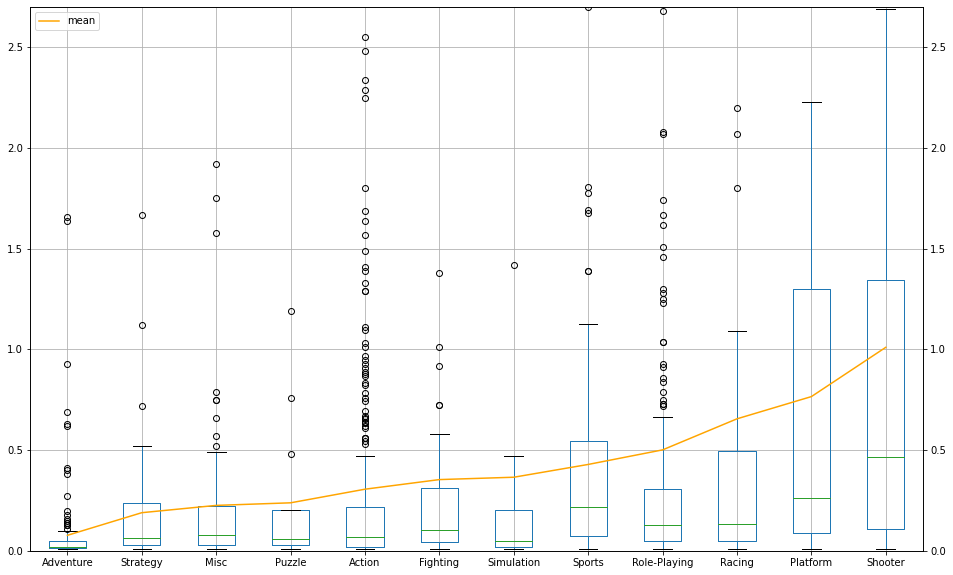

In [71]:
df_barplot_genre = df_actual.pivot_table(
    columns='genre', index='name', values='world_sales', aggfunc='median') #собираем сводную таблицу для построения общего ящика

idx = df_barplot_genre.mean().sort_values().index #упорядочивание платформ в порядке возрастания среденего
df_barplot_genre = df_barplot_genre[idx] #присвоить таблице упорядоченный вид

fig, ax = plt.subplots(figsize=(16,10)) #св-ва графика

df_barplot_genre.plot.box(rot=0, ax=ax, grid=True) #ящики с подписью без вращения
ax.set_ylim(0,2.7)
ax2 = ax.twinx() #создание второй оси
ax2.plot(ax.get_xticks(), df_barplot_genre.mean(), color='orange') #график средней
ax2.set_ylim(0,2.7) #задание лимитов по оси y в соответствии с ящиками с усами
plt.legend(['mean'], loc='upper left'); #легенда

## "Портрет" пользователя

### Самые популярные платформы по регионам

Проанализируем данные для актуальных платформ:

In [73]:
df_actual_region_eu = df_actual.pivot_table(
    index='platform', values=['eu_sales'], aggfunc='sum').sort_values(by=['eu_sales'], ascending=False)
#создание сводных таблиц для каждого региона с индексом - платформой и значениями - продажами в этом регионе 
#отсортированные в порядке убывания продаж

other_platforms = 0 #накопительная переменная

for i in range(len(df_actual_region_eu)): #для каждого индекса
    if i > 4: #если индекс больше 4
        temp = other_platforms + df_actual_region_eu['eu_sales'][i] 
        #тогда присваиваем значение для временной переменной на каждой итерации как сумму накопления и значения текущ. итерации
        other_platforms = temp.round(2) #накапливаем накопительную переменную

df_actual_region_eu = df_actual_region_eu.head() #обрезаем таблицу
index_eu = ['Other'] #список индексов для новой таблицы
temp_eu = pd.DataFrame() #создаем DF
temp_eu['eu_sales'] = [other_platforms] #столбец для новой таблицы - значение накопительной переменной. Это значение суммы всех не ТОП-ов
temp_eu.index = index_eu #индексы по листу

df_actual_region_eu = df_actual_region_eu.append(temp_eu, ignore_index = False)  #добавляем вторую таблицу к первой снизу
#не игнорируя индексы

print(df_actual_region_eu)

       eu_sales
PS4      141.09
PS3       67.81
XOne      51.59
X360      42.52
3DS       30.96
Other     58.26


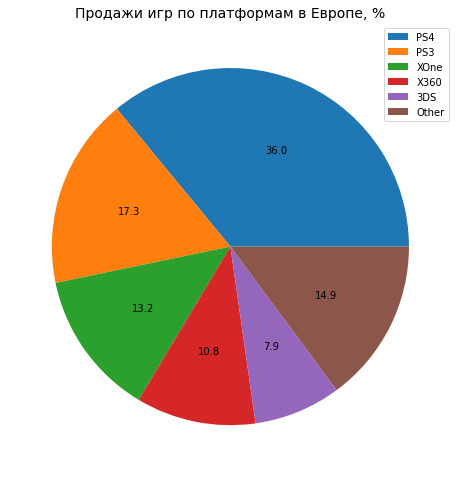

In [74]:
fig = plt.figure(figsize =(8, 20)) #размеры: для круговой диаграммы определяются меньшим значением из двух указанных
plt.pie(df_actual_region_eu['eu_sales'] * 100, autopct='%.1f') #по какому столбцу строится диаграмма 
#(*100, т.к. если сумма значений < 1, то диаграмма не заполнится вся. Т.е. берем %; с 1 знаком после ,)
plt.title('Продажи игр по платформам в Европе, %', fontsize=14) #имя графика
plt.legend(labels = df_actual_region_eu.index ) #легенда
plt.show()

In [75]:
df_actual_region_na = df_actual.pivot_table(
    index='platform', values=['na_sales'], aggfunc='sum').sort_values(by=['na_sales'], ascending=False)
#создание сводных таблиц для каждого региона с индексом - платформой и значениями - продажами в этом регионе 
#отсортированные в порядке убывания продаж

other_platforms = 0 #накопительная переменная

for i in range(len(df_actual_region_na)): #для каждого индекса
    if i > 4: #если индекс больше 4
        temp = other_platforms + df_actual_region_na['na_sales'][i] 
        #тогда присваиваем значение для временной переменной на каждой итерации как сумму накопления и значения текущ. итерации
        other_platforms = temp.round(2) #накапливаем накопительную переменную

df_actual_region_na = df_actual_region_na.head() #обрезаем таблицу
index_na = ['Other'] #список индексов для новой таблицы
temp_na = pd.DataFrame() #создаем DF
temp_na['na_sales'] = [other_platforms] #столбец для новой таблицы - значение накопительной переменной. Это значение суммы всех не ТОП-ов
temp_na.index = index_na #индексы по листу

df_actual_region_na = df_actual_region_na.append(temp_na, ignore_index = False)  #добавляем вторую таблицу к первой снизу
#не игнорируя индексы

print(df_actual_region_na)

       na_sales
PS4      108.74
XOne      93.12
X360      81.66
PS3       63.50
3DS       38.20
Other     52.49


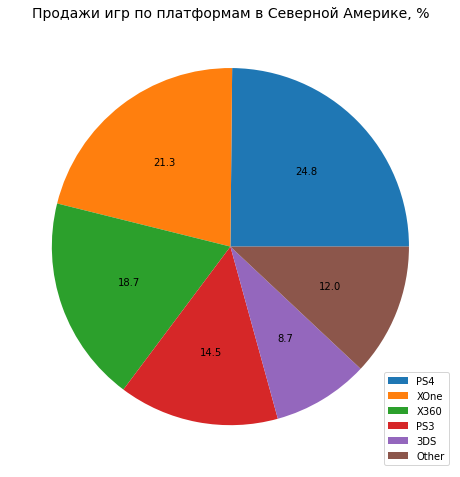

In [76]:
fig = plt.figure(figsize =(8, 20)) 
plt.pie(df_actual_region_na['na_sales'] * 100, autopct='%.1f')
plt.title('Продажи игр по платформам в Северной Америке, %', fontsize=14) 
plt.legend(labels = df_actual_region_na.index )
plt.show()

In [77]:
df_actual_region_jp = df_actual.pivot_table(
    index='platform', values=['jp_sales'], aggfunc='sum').sort_values(by=['jp_sales'], ascending=False)
#создание сводных таблиц для каждого региона с индексом - платформой и значениями - продажами в этом регионе 
#отсортированные в порядке убывания продаж

other_platforms = 0 #накопительная переменная

for i in range(len(df_actual_region_jp)): #для каждого индекса
    if i > 4: #если индекс больше 4
        temp = other_platforms + df_actual_region_jp['jp_sales'][i] 
        #тогда присваиваем значение для временной переменной на каждой итерации как сумму накопления и значения текущ. итерации
        other_platforms = temp.round(2) #накапливаем накопительную переменную

df_actual_region_jp = df_actual_region_jp.head() #обрезаем таблицу
index_jp = ['Other'] #список индексов для новой таблицы
temp_jp = pd.DataFrame() #создаем DF
temp_jp['jp_sales'] = [other_platforms] #столбец для новой таблицы - значение накопительной переменной. Это значение суммы всех не ТОП-ов
temp_jp.index = index_jp #индексы по листу

df_actual_region_jp = df_actual_region_jp.append(temp_jp, ignore_index = False)  #добавляем вторую таблицу к первой снизу
#не игнорируя индексы

print(df_actual_region_jp)

       jp_sales
3DS       67.81
PS3       23.35
PSV       18.59
PS4       15.96
WiiU      10.88
Other      4.19


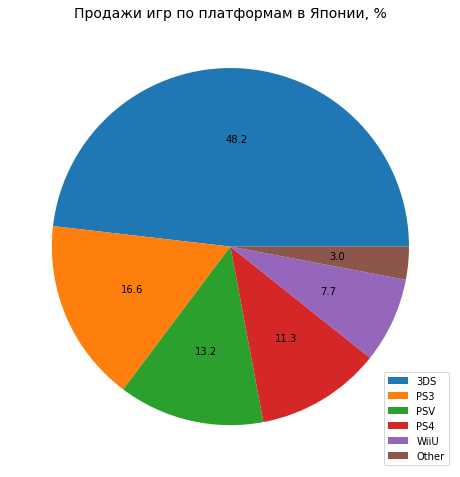

In [78]:
fig = plt.figure(figsize =(8, 20))
plt.pie(df_actual_region_jp['jp_sales'] * 100, autopct='%.1f')
plt.title('Продажи игр по платформам в Японии, %', fontsize=14)
plt.legend(labels = df_actual_region_jp.index )
plt.show()

**Выводы:**

- Европа:

Лидер по продажам в Европе - PS4, занявшая более трети рынка. За ней следуют PS3 и XOne.

В Европе предпочитают игры, нацеленные на западную аудиторию, но так исторически сложилось, что эту нишу в большей степени занимают консоли от PlayStation. 

- Северная Америка:

Лидирует консоль PS4, за ней следуют XOne, пратически без отрыва XOne. X360 немного отстает.

В Северной Америке (основной рынок - США), тоже любят консоли и игры, нацеленные на западную аудиторию. Но здесь, в отличие от Европы, основной рынок делит две консоли: PS4 и XOne, практически поровну.

В Европе и Америке доля "всех остальных" намного выше, порядка 15%. Обратим внимание также на то, что в рейтинг по Северной Америке и Европе входят одинаковые консоли, с небольшими различиями в процентном отношении.

- Япония:

Абсолютным лидером по продажам в Японии является 3DS, имеющий почти половину всех продаж. 

Как можно заметить, в Японии очень популярны японские консоли, но еще большую популярнось имеют японские портативные консоли. Отсюда и такой большой отрыв у 3DS. Также, на рынке японии в топах отсутствуют, например, американские консоли, а все остальные платформы, ктоме ТОПа умещаются всего в 3%.

Здесь можно заметить сходство между европейским и американским игроком в предпочтениях и их отличие от японского игрока.

### Самые популярные жанры по регионам

Проанализируем данные для актуальных платформ:

In [80]:
df_genre_region_eu = df_actual.pivot_table(
    index='genre', values=['eu_sales'], aggfunc='sum').sort_values(by=['eu_sales'], ascending=False)
#создание сводных таблиц для каждого региона с индексом - жанром и значениями - продажами в этом регионе 
#отсортированные в порядке убывания продаж

other_platforms = 0 #накопительная переменная

for i in range(len(df_genre_region_eu)): #для каждого индекса
    if i > 4: #если индекс больше 4
        temp = other_platforms + df_genre_region_eu['eu_sales'][i] 
        #тогда присваиваем значение для временной переменной на каждой итерации как сумму накопления и значения текущ. итерации
        other_platforms = temp.round(2) #накапливаем накопительную переменную

df_genre_region_eu = df_genre_region_eu.head() #обрезаем таблицу
index_eu = ['Other'] #список индексов для новой таблицы
temp_eu = pd.DataFrame() #создаем DF
temp_eu['eu_sales'] = [other_platforms] #столбец для новой таблицы - значение накопительной переменной. Это значение суммы всех не ТОП-ов
temp_eu.index = index_eu #индексы по листу

df_genre_region_eu = df_genre_region_eu.append(temp_eu, ignore_index = False)  #добавляем вторую таблицу к первой снизу
#не игнорируя индексы

print(df_genre_region_eu)

              eu_sales
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Other            68.56


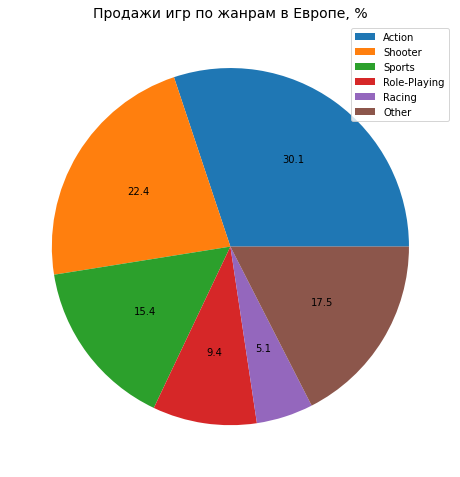

In [81]:
fig = plt.figure(figsize =(8, 20)) #размеры: для круговой диаграммы определяются меньшим значением из двух указанных
plt.pie(df_genre_region_eu['eu_sales'] * 100, autopct='%.1f') #по какому столбцу строится диаграмма 
#(*100, т.к. если сумма значений < 1, то диаграмма не заполнится вся. Т.е. берем %; с 1 знаком после ,)
plt.title('Продажи игр по жанрам в Европе, %', fontsize=14) #имя графика
plt.legend(labels = df_genre_region_eu.index ) #легенда
plt.show()

In [82]:
df_genre_region_na = df_actual.pivot_table(
    index='genre', values=['na_sales'], aggfunc='sum').sort_values(by=['na_sales'], ascending=False)
#создание сводных таблиц для каждого региона с индексом - жанром и значениями - продажами в этом регионе 
#отсортированные в порядке убывания продаж

other_platforms = 0 #накопительная переменная

for i in range(len(df_genre_region_na)): #для каждого индекса
    if i > 4: #если индекс больше 4
        temp = other_platforms + df_genre_region_na['na_sales'][i] 
        #тогда присваиваем значение для временной переменной на каждой итерации как сумму накопления и значения текущ. итерации
        other_platforms = temp.round(2) #накапливаем накопительную переменную

df_genre_region_na = df_genre_region_na.head() #обрезаем таблицу
index_na = ['Other'] #список индексов для новой таблицы
temp_na = pd.DataFrame() #создаем DF
temp_na['na_sales'] = [other_platforms] #столбец для новой таблицы - значение накопительной переменной. Это значение суммы всех не ТОП-ов
temp_na.index = index_na #индексы по листу

df_genre_region_na = df_genre_region_na.append(temp_na, ignore_index = False)  #добавляем вторую таблицу к первой снизу
#не игнорируя индексы

print(df_genre_region_na)

              na_sales
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Other            62.76


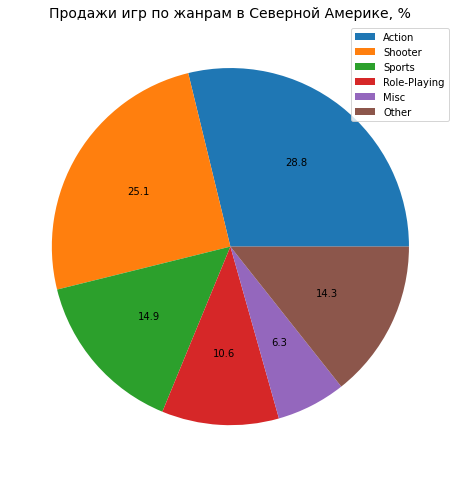

In [83]:
fig = plt.figure(figsize =(8, 20)) 
plt.pie(df_genre_region_na['na_sales'] * 100, autopct='%.1f')
plt.title('Продажи игр по жанрам в Северной Америке, %', fontsize=14) 
plt.legend(labels = df_genre_region_na.index )
plt.show()

In [84]:
df_genre_region_jp = df_actual.pivot_table(
    index='genre', values=['jp_sales'], aggfunc='sum').sort_values(by=['jp_sales'], ascending=False)
#создание сводных таблиц для каждого региона с индексом - жанром и значениями - продажами в этом регионе 
#отсортированные в порядке убывания продаж

other_platforms = 0 #накопительная переменная

for i in range(len(df_genre_region_jp)): #для каждого индекса
    if i > 4: #если индекс больше 4
        temp = other_platforms + df_genre_region_jp['jp_sales'][i] 
        #тогда присваиваем значение для временной переменной на каждой итерации как сумму накопления и значения текущ. итерации
        other_platforms = temp.round(2) #накапливаем накопительную переменную

df_genre_region_jp = df_genre_region_jp.head() #обрезаем таблицу
index_jp = ['Other'] #список индексов для новой таблицы
temp_jp = pd.DataFrame() #создаем DF
temp_jp['jp_sales'] = [other_platforms] #столбец для новой таблицы - значение накопительной переменной. Это значение суммы всех не ТОП-ов
temp_jp.index = index_jp #индексы по листу

df_genre_region_jp = df_genre_region_jp.append(temp_jp, ignore_index = False)  #добавляем вторую таблицу к первой снизу
#не игнорируя индексы

print(df_genre_region_jp)

              jp_sales
Role-Playing     51.04
Action           40.49
Misc              9.20
Fighting          7.65
Shooter           6.61
Other            25.79


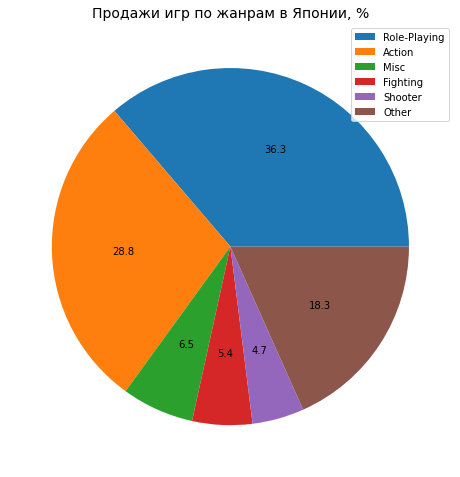

In [85]:
fig = plt.figure(figsize =(8, 20))
plt.pie(df_genre_region_jp['jp_sales'] * 100, autopct='%.1f')
plt.title('Продажи игр по жанрам в Японии, %', fontsize=14)
plt.legend(labels = df_genre_region_jp.index )
plt.show()

**Выводы:**

- Европа и Северная Америка:

Пользователи из этих регионов имеют схожие вкусы в играх. 

На первом месте - экшены, занимают треть игр в обоих регионах. Далее шутеры, спортивные и ролевые игры. Пятое место различается у европейцев и американцев. Так, для первых предпочтительнее гонки, для вторых - игры без определенного жанра.

Игры, не вошедшие в пятерку популярных занимают в обоих случаях порядка 15%.

Принципиальная разница: в Европе любят гонки, в отличие от Америки.

- Япония:

С Японией картина совершенно другая картина: любимые жанры японцев - ролевые игры, около трети всех продаж. Экшены занимают немногим менее трети рынка. Остальное распределено между играми без определенного жанра, файтингами и шутерами. Процент всех остальных игр примерно такой же, как у остальных регионов.

### Влияние рейтинга ESRB на продажи

In [86]:
df_actual.groupby('rating')['rating'].count()

rating
E       302
E10+    252
M       369
T       333
n/a     977
Name: rating, dtype: int64

Здесь мы имеем такие рейтинги для игр:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «n/a» - значение, которым мы закрыли пропуски. Рейтинг не указан.

Данная классификация, за исключением n/a, применяется для игр США и Канады, т.е. регион Северная Америка. Это важная деталь.

In [87]:
df_rating_region_eu = df_actual.pivot_table(
    index='rating', values=['eu_sales'], aggfunc='sum').sort_values(by=['eu_sales'], ascending=False).head()
df_rating_region_na = df_actual.pivot_table(
    index='rating', values=['na_sales'], aggfunc='sum').sort_values(by=['na_sales'], ascending=False).head()
df_rating_region_jp = df_actual.pivot_table(
    index='rating', values=['jp_sales'], aggfunc='sum').sort_values(by=['jp_sales'], ascending=False).head()
#создание сводных таблиц для каждого региона с индексом - рейтингом и значениями - продажами в этом регионе
#отсортированные в порядке убывания продаж

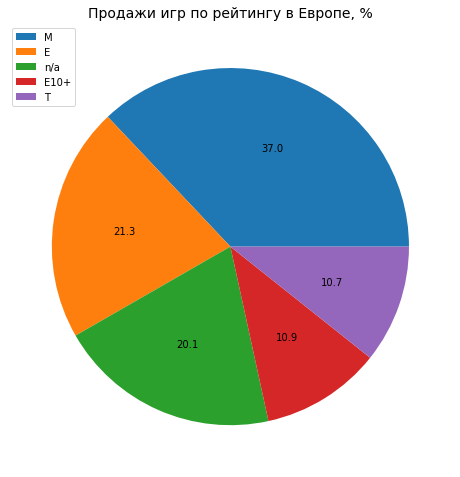

In [88]:
fig = plt.figure(figsize =(8, 20)) #размеры: для круговой диаграммы определяются меньшим значением из двух указанных
plt.pie(df_rating_region_eu['eu_sales'] * 100, autopct='%.1f') #по какому столбцу строится диаграмма 
#(*100, т.к. если сумма значений < 1, то диаграмма не заполнится вся. Т.е. берем %; с 1 знаком после ,)
plt.title('Продажи игр по рейтингу в Европе, %', fontsize=14) #имя графика
plt.legend(labels = df_rating_region_eu.index ) #легенда
plt.show()

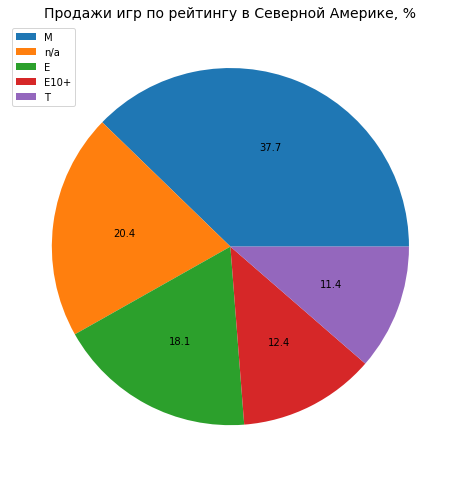

In [89]:
fig = plt.figure(figsize =(8, 20)) 
plt.pie(df_rating_region_na['na_sales'] * 100, autopct='%.1f')
plt.title('Продажи игр по рейтингу в Северной Америке, %', fontsize=14) 
plt.legend(labels = df_rating_region_na.index )
plt.show()

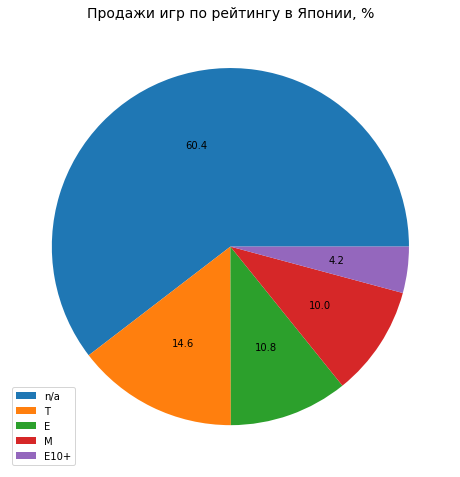

In [90]:
fig = plt.figure(figsize =(8, 20))
plt.pie(df_rating_region_jp['jp_sales'] * 100, autopct='%.1f')
plt.title('Продажи игр по рейтингу в Японии, %', fontsize=14)
plt.legend(labels = df_rating_region_jp.index )
plt.show()

**Выводы:**

- Европа и Северная Америка:

Пользователи из этих регионов предпочитают абсолютно одинаковые (по рейтингу) игры и в одинаковых пропорциях.

Более трети игр приобретается для взрослых, около 20% делят между собой игры для всех возрастов и игры без рейтинга, оставшуюся часть делят игры для подростков и тех, кому больше 10 лет (10+ меньше всего), примерно по 10%. Процент немного различается, но значения очень близки. 

- Япония:

В Японии 60% игр не имеют рейтинга, 15% игр предназначены для подростков, по 10% распределено между играми для взрослых и играми для всех, совсем небольшой процент игр приходится на рейтинг 10+.

Из этого можно сделать предположение, что 60% игр без рейтинга для Японии - это игры, выпущенные самой Японией (плюс Европа и остальной мир). Косвенно это может подтвердить то, что почти все консоли в Японии - японские, особенно 3DS. Для Европы и Америки показатели игр без рейтинга значительно ниже. 

Северная Америка обеспечивает играми 80% рынка Северной Америки и Европы, и 40% рынка Японии.

### Общие выводы по разделу

Из анализа выше следует, что западные игроки, а именно европейские и американские, очень похожи в предпочтениях по жанру игр, покупают одинаковые (или близки к этому) платформы для игр, а также имеют абсолютно одинаковую рейтинговую статистику: то есть, процентное распределение игроков по возрасту одинаковое.

Японские же игроки во всех аспектах отличны от западных игроков: они интересуются другими жанрами игр, а если жанр такой же, то точно будет отличный процент от западных игроков, им нравятся другие консоли, а распределение по возрасту не соотвествует западному: японская аудитория моложе.

## Гипотезы

### Рейтинги платформ

Проверить гипотезу:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Это нулевая гипотеза. Введем альтернативную:

- Средние пользовательские рейтинги платформ Xbox One и PC разные.

Эта гипотеза о неравенстве средних двух генеральных совокупностей, альтернативная.


Так как в совокупности не очень много значений, сначала можно проверить гипотезу вручную, рассчитав средние значения совокупностей:

In [92]:
df_actual_for_score = df_actual.query('user_score >=0')
df_actual_for_score.pivot_table(
    index='platform', values=['user_score'], aggfunc='mean').round(1)

,user_score
platform,
3DS,7.0
DS,4.8
PC,6.3
PS3,6.3
PS4,6.7
PSP,5.9
PSV,7.5
Wii,5.3
WiiU,7.0


Мы видим средние оценки для XOne и PC 6.5 и 6.3 соответственно. С одной стороны оценки близки, разница составляет всего 0.2 балла, т.е 2% (данные округлены).

Теперь проверим гипотезу методами python. Массивы:

In [93]:
df_user_score_PC = list(df_actual_for_score.query('platform == "PC"')['user_score'])
df_user_score_XOne = list(df_actual_for_score.query('platform == "XOne"')['user_score'])
#составляем списки оценок пользователей по платформам

Для проверки гипотезы равенства двух совокупностей в python есть специальный метод. Для выполнения теста необходимо, чтобы:

- Совокупности не зависели друг от друга.

Они не зависят. Оценка одного жанра никак не влияет на оценку другого жанра. Рейтинги платформы тоже не зависят друг от друга.

- Выборочные средние должны быть нормально распределены.

Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. 

- Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

Для того, чтобы обойти это ограничение, используем параметр `equal_var=False`. Так мы обозначаем, что дисперсии совокупностей различны. В этом случае тест считает дисперсии совокупностей отдельно.

In [94]:
var_user_score_PC = np.var(df_user_score_PC) #считаем дисперсию
var_user_score_XOne = np.var(df_user_score_XOne) #считаем дисперсию

print('Дисперсия пользовательского рейтинга PC равна', var_user_score_PC,
      '\n\nДисперсия пользовательского рейтинга Xbox One равна',var_user_score_XOne)

Дисперсия пользовательского рейтинга PC равна 3.016306347554631 

Дисперсия пользовательского рейтинга Xbox One равна 1.8965188383045526


In [95]:
alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_ind( #метод для проверки гипотезы\
#о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
#
    df_user_score_PC, #массив1
    df_user_score_XOne, #массив2
    equal_var=False) #здесь дисперсии совокупностей принимаем равными


print('p-значение:', results.pvalue) #вывод значения p-value

if results.pvalue < alpha: #если уровень значимости меньше уровня стат. значимости
    print("Отвергаем нулевую гипотезу") #нулевая гипотеза отвергается
else: #иначе
    print("Не получилось отвергнуть нулевую гипотезу") #нулевая гип. не отверг.

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


- alpha: критический уровень статистической значимости. Он выбирается аналитиком, исходя из необходимой точности. Одно из стандартных значений - 5%. Мы приняли его.

- Значение p-value ~8%, а это значит, что вероятность получить наблюдаемый (или более далекий) от предполагаемого (среднего совокупности) результат, при условии, что нулевая гипотеза верна, выше уровня статистической значимости, т.е. значение p-value при заданных условиях находится ближе к среднему совокупности, чем критический уровень статистической значимости. 

**Нулевую гипотезу отвергать нельзя:** `Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.`

### Рейтинги жанров

Проверить гипотезу:

- Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Это нулевая гипотеза. Введем альтернативную:

- Средние пользовательские рейтинги жанров Action и Sports разные.

Эта гипотеза о неравенстве средних двух генеральных совокупностей, альтернативная.

In [96]:
df_actual_for_score.pivot_table(
    index='genre', values=['user_score'], aggfunc='mean').round(1)

,user_score
genre,
Action,6.8
Adventure,7.5
Fighting,7.0
Misc,7.0
Platform,6.7
Puzzle,7.5
Racing,6.1
Role-Playing,7.4
Shooter,6.3


Мы видим средние оценки для Action и Sports от пользователей 6.8 и 5.2 соответственно. Даже в таком виде понимаешь, что скорее всего нулевая гипотеза будет отвергнута.

Теперь проверим гипотезу методами python. Массивы:

In [97]:
df_user_score_Action = list(df_actual_for_score.query('genre == "Action"')['user_score'])
df_user_score_Sports = list(df_actual_for_score.query('genre == "Sports"')['user_score'])
#составляем списки оценок пользователей по платформам

In [98]:
var_user_score_Action = np.var(df_user_score_Action) #считаем дисперсию
var_user_score_Sports = np.var(df_user_score_Sports) #считаем дисперсию

print('Дисперсия пользовательского рейтинга Action равна', var_user_score_Action,
      '\n\nДисперсия пользовательского рейтинга Sports равна',var_user_score_Sports)

Дисперсия пользовательского рейтинга Action равна 1.7648124186332366 

Дисперсия пользовательского рейтинга Sports равна 3.160733984375


In [99]:
alpha = 0.05 #критический уровень статистической значимости

results = st.ttest_ind( #метод для проверки гипотезы\
#о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
#
    df_user_score_Action, #массив1
    df_user_score_Sports, #массив2
    equal_var=False) #здесь дисперсии совокупностей принимаем равными


print('p-значение:', results.pvalue) #вывод значения p-value

if results.pvalue < alpha: #если уровень значимости больше уровня стат. значимости
    #поменяли знак, т.к. доказать нужно НЕ одинаковость, а различие совокупностей.
    print("Отвергаем нулевую гипотезу") #нулевая гипотеза отвергается
else: #иначе
    print("Не получилось отвергнуть нулевую гипотезу") #нулевая гип. не отверг.

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


- Значение p-value стремится к 0, т.е. значение p-value при заданных условиях находится ближе к краям нормального распределения, а критический уровень статистической значимости - ближе к среднему совокупности. Это грачит, что очень высока вероятность того, что оценки разные.

**Отвергаем нулевую гипотезу:** `Средние пользовательские рейтинги жанров Action и Sports одинаковые.`

### Вывод

В данном проекте были определены влияющие на успешность игр закономерности, а именно:
- Жанры: есть жанры популярные, а есть нишевые. Конечно, чем популярнее жанр, тем на большее количество потенциальных продаж можно рассчитывать.
- Платформы: разные люди предпочитают разные устройства для игр. А может, и наоборот.
- Актуальность платформ: были разобраны критерии актуальности платформ. Несмотря на то, что лидерами продаж всех времен были одни консоли, ставку на будущие продажи мы делаем на другие консоли. Все потому, что у этих устройств есть жизненный цикл - срок актуальности, когда игры выпускаются на эту платформу. Лидеры продаж за все время - это обычно ушедшие (или уходящие) на покой устройства. 
- Удивительно, но регион. Для того, чтобы успешно вести дела на рынке, нужно знать своих клиентов. Были выявлены отличающие и общие признаки "портрета" пользователей по регионам. Иногда разница бывает огромной.
- Отмечу, что, хоть и влияние прессы и критиков совсем небольшое, все же оно есть. Иногда критики могут влиять на продажи.

Для получения итоговых данных, была произведена подготовка датасета, а именно:
- Подготовка данных: заполнение пропусков, преобразование типов данных, проверка на дубликаты и т.д.
- Проведен исследовательский анализ данных, благодаря которому удалось получить закономерности, указанные выше в выводе.
- Был составлен "портрет" пользователя каждого региона, который дополнил данные, полученные в исследовательском анализе.

Также были проверены некоторые гипотезы, относительно пользовательских оценок и платформ / жанров.

**Результаты:**

Для успешного ведения дел необходимо вкладываться в PS4 и XOne - молодые и набирающие популярность консоли. Продажи растут в течение нескольких лет и они еще не перестали быть актуальными. Также, возможно, в 3DS, т.к. эта консоль покрывает половину рынка Японии, но нужно быть осторожным, она постепенно теряет в продажах. 

Для Америки и Европы стоит отдать предпочтение экшенам и шутерам, эти жанры покрывают более половины рынка. Также не упускать из вида ролевые и спортивные игры. Для Японии нужно сделать акцент на ролевые игры и экшены - это покроет две трети спроса.

Что касается рейтинга, то на основании 80% известных рейтингов для Америки и Европы, можно сделать вывод, что основная аудитория этих регионов - взрослые. Также весомую долю занимают игры с рейтингом "для всех". На основании 40% известных рейтингов для Японии, имеем более молодую аудиторию - подростки и "для всех". 

По рейтингам мы предположили, исходя из того, что это рейтинги американской классификации, что 80% игр в Европе и Америке, а также 40% игр в Японии - американские. В число 20% для Америки и Европы подпадают европейские, японские игры, а также игры других регионов. В числе 60% игр без рейтинга в Японии - японские, европейские игры, а также игры других регионов.

Учитывая то, что в Японии 97% консолей - японские, можно с большой долей уверенности говорить, что большая часть игр без рейтинга в Японии - японские.

Отзывы критиков могут влиять на продажи игр, корреляция есть. Но корреляция слабая, поэтому влияние отзывов не всегда имеет место быть.

Отзывы игроков имеют корреляцию с продажами только на японских консолях, которые распространены в Японии, и почти не распространены в остальных регионах: PSV, 3DS и WiiU. Можно предположить, что к отзывам игроков прислушиваются японские геймеры. Для остальных консолей корреляция между оценками игроков и продажами - нулевая, рассчитывать на них не стоит.